In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import time

#Feature selection
# from pyswarm import pso

#Pre-processing, evaluation
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score 
from sklearn.metrics import roc_auc_score, matthews_corrcoef,recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import LinearSVC
from sklearn import tree

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D, Dropout
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.layers import LSTM, SimpleRNN
# from tensorflow.keras.optimizers import Adam

import joblib

# Data loading

In [55]:
df = pd.read_csv('csv-wsn-ids-ds.csv')

# Data pre-processing

In [56]:
df.shape

(374661, 19)

In [57]:
df.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [58]:
df.describe()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


In [59]:
df.info()
# has Attack feature should be encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [60]:
df.isnull().sum()
# doesnt have any null values

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
dtype: int64

In [61]:
df_copy = df.drop(["Attack type"], axis = 1)
df_copy.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534


In [62]:
corr = df_copy.corr()
corr

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
id,1.000000,0.674170,0.179659,1.000000,-0.329638,0.042635,-0.039515,-0.561031,-0.046773,-0.023138,-0.510604,-0.239057,-0.183151,0.057861,0.088892,0.485083,-0.291817,0.001999
Time,0.674170,1.000000,0.282040,0.674184,-0.352468,0.012819,0.061591,-0.502793,-0.039882,0.000210,-0.439315,-0.316458,-0.042900,0.081480,0.061050,0.352591,-0.242577,0.028775
Is_CH,0.179659,0.282040,1.000000,0.179665,-0.372439,0.358947,0.399472,-0.681119,0.434253,0.289925,-0.601437,-0.238737,-0.381239,0.288215,0.365186,0.310198,-0.375453,0.236316
who CH,1.000000,0.674184,0.179665,1.000000,-0.329650,0.042634,-0.039512,-0.561048,-0.046774,-0.023138,-0.510622,-0.239066,-0.183153,0.057876,0.088896,0.485098,-0.291824,0.002007
Dist_To_CH,-0.329638,-0.352468,-0.372439,-0.329650,1.000000,-0.133686,-0.009616,0.546805,-0.161619,-0.107979,0.458355,0.382459,-0.006305,-0.315255,-0.217098,-0.420626,0.198440,-0.182533
ADV_S,0.042635,0.012819,0.358947,0.042634,-0.133686,1.000000,0.239682,-0.244485,0.086911,0.040939,-0.188804,-0.085694,-0.136844,0.058440,0.149805,0.200963,-0.134768,0.119152
ADV_R,-0.039515,0.061591,0.399472,-0.039512,-0.009616,0.239682,1.000000,-0.099586,-0.059558,-0.038879,-0.223524,-0.020825,-0.064312,-0.126620,-0.030728,-0.077467,0.143532,0.074849
JOIN_S,-0.561031,-0.502793,-0.681119,-0.561048,0.546805,-0.244485,-0.099586,1.000000,-0.295760,-0.197473,0.897659,0.313790,0.486601,-0.585557,-0.381757,-0.761552,0.551230,-0.324784
JOIN_R,-0.046773,-0.039882,0.434253,-0.046774,-0.161619,0.086911,-0.059558,-0.295760,1.000000,0.611823,-0.270283,-0.103712,-0.165314,0.450515,0.165065,0.131150,-0.162926,0.213972
SCH_S,-0.023138,0.000210,0.289925,-0.023138,-0.107979,0.040939,-0.038879,-0.197473,0.611823,1.000000,-0.180473,-0.069216,-0.110531,0.029406,0.053736,0.005122,-0.108853,0.032082


<Axes: >

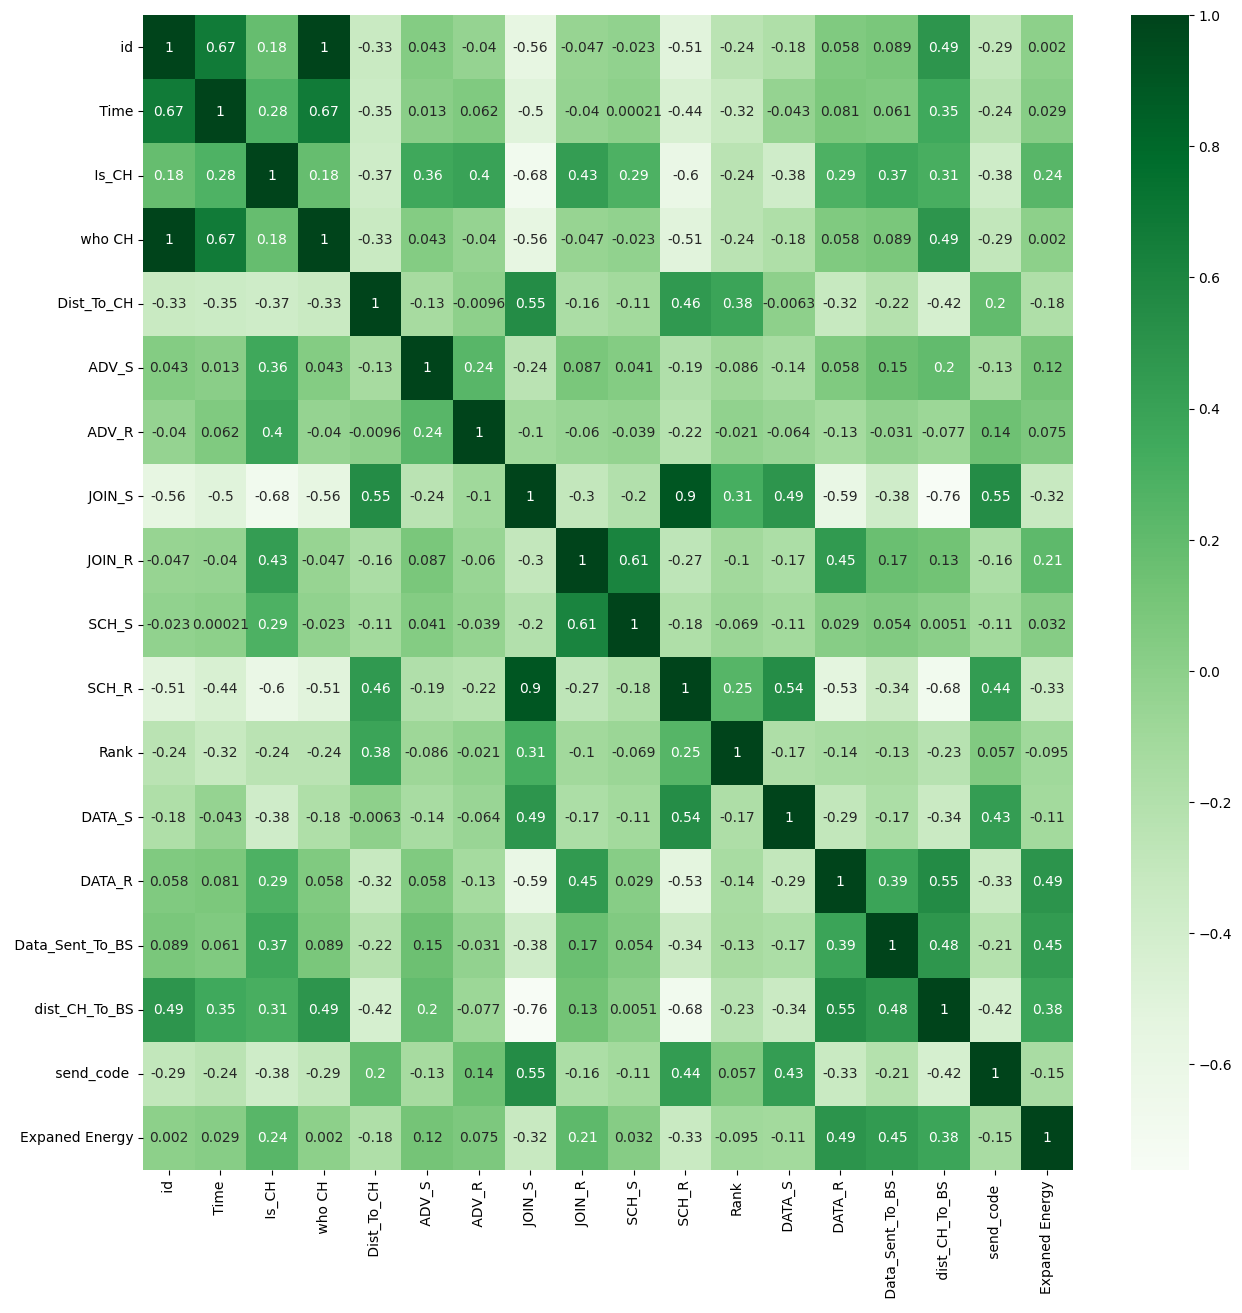

In [63]:
plt.subplots(figsize=(15,15))
sns.heatmap(corr, cmap='Greens', annot=True)

# we may remove who CH feature

In [64]:
# remove who CH feature and split data to x and y:

df.columns = df.columns.str.strip() # the column name of who CH has extra spaces, remove them

columsToDrop = ['Attack type', 'who CH']
x = df.drop(columns=columsToDrop)
y = df["Attack type"]

In [65]:
# Encode the target variable 'Attack type' using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [66]:
y

array([3, 3, 3, ..., 3, 3, 3], shape=(374661,))

In [67]:
uniqueClasses = np.unique(y)
print(f'unique encoded classes: {uniqueClasses}')

unique encoded classes: [0 1 2 3 4]


In [68]:
# correlation with features and output

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[categorical_columns])

# Create a new DataFrame for the one-hot encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Merge encoded columns back with the original data
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

correlation_matrix = df_encoded.corr()

In [69]:
df_encoded.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,...,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type_Flooding,Attack type_Grayhole,Attack type_Normal,Attack type_TDMA
0,101000,50,1,101000,0.00000,1,0,0,25,1,...,0,1200,48,130.08535,0,2.46940,0.0,0.0,1.0,0.0
1,101001,50,0,101044,75.32345,0,4,1,0,0,...,38,0,0,0.00000,4,0.06957,0.0,0.0,1.0,0.0
2,101002,50,0,101010,46.95453,0,4,1,0,0,...,41,0,0,0.00000,3,0.06898,0.0,0.0,1.0,0.0
3,101003,50,0,101044,64.85231,0,4,1,0,0,...,38,0,0,0.00000,4,0.06673,0.0,0.0,1.0,0.0
4,101004,50,0,101010,4.83341,0,4,1,0,0,...,41,0,0,0.00000,3,0.06534,0.0,0.0,1.0,0.0


<Axes: >

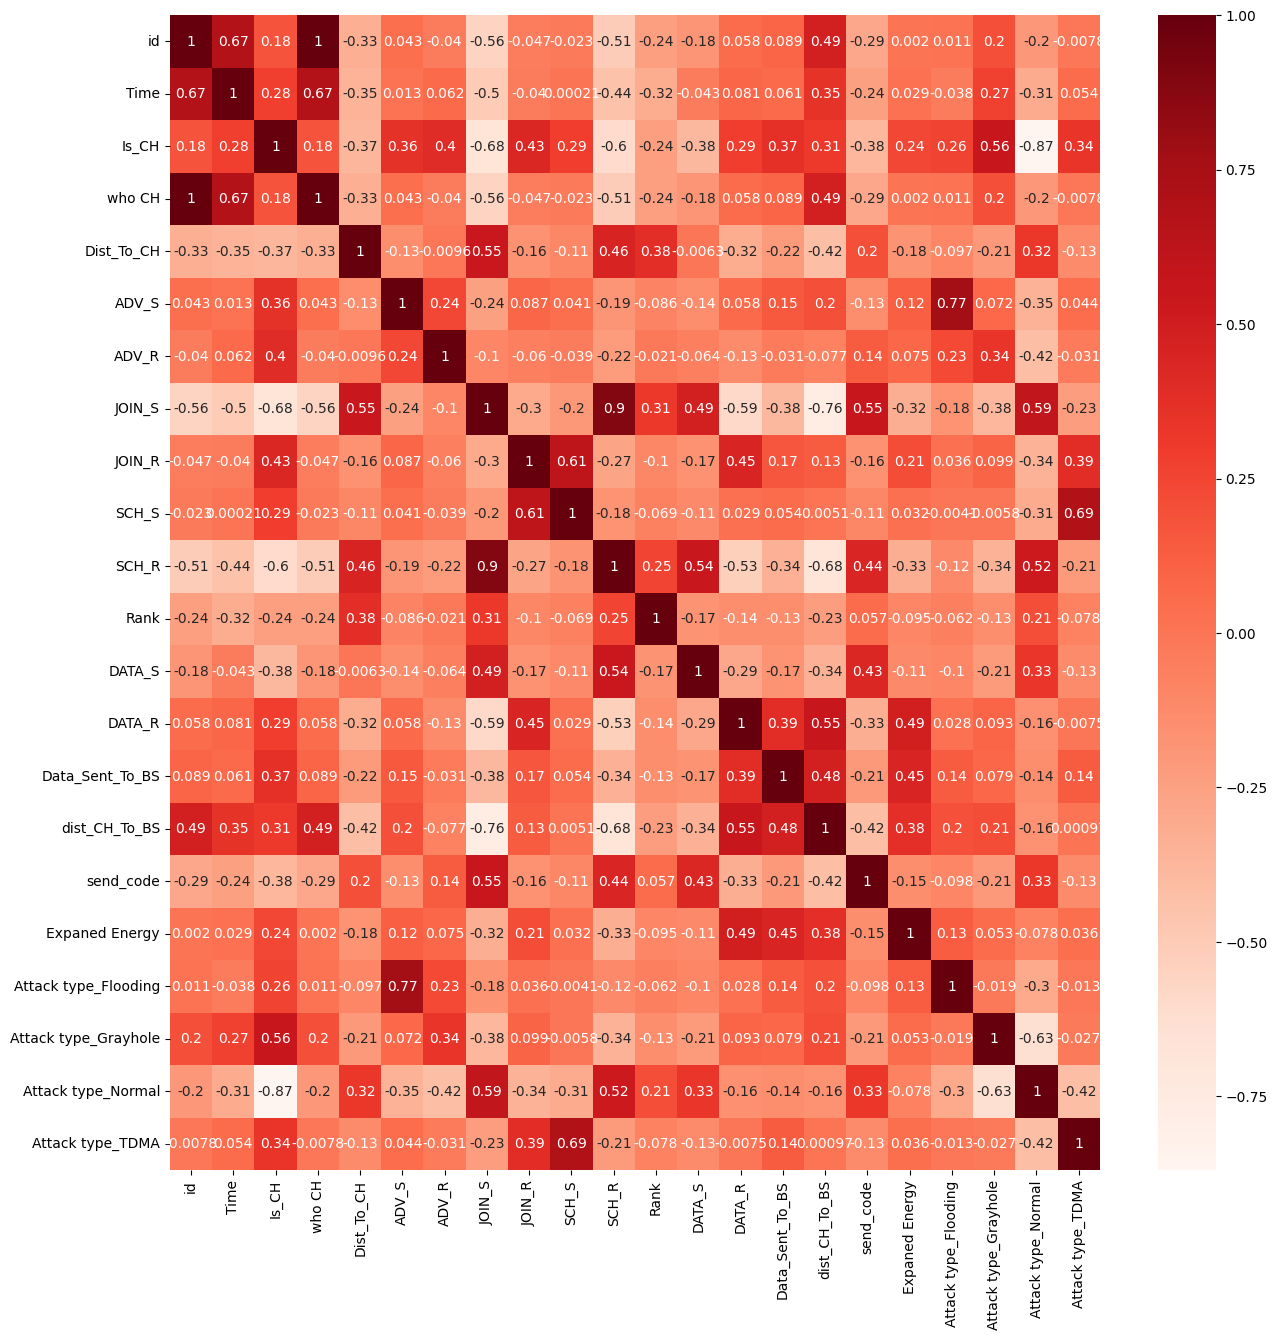

In [70]:
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix, cmap='Reds', annot=True)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, train_size = 0.8, random_state = 42,stratify=y)

In [72]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [73]:
X_train_scaled

array([[0.00547424, 0.2543662 , 0.        , ..., 0.        , 0.2       ,
        0.00103672],
       [0.03212024, 0.35295775, 0.        , ..., 0.        , 0.2       ,
        0.00133233],
       [0.00182121, 0.08535211, 0.        , ..., 0.        , 0.13333333,
        0.00145829],
       ...,
       [0.03029479, 0.2684507 , 0.        , ..., 0.        , 0.33333333,
        0.0029199 ],
       [0.00515374, 0.24028169, 0.        , ..., 0.        , 0.46666667,
        0.00287755],
       [0.12178319, 0.84591549, 0.        , ..., 0.        , 0.13333333,
        0.00525503]], shape=(299728, 17))

In [74]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [75]:
X_train_scaled

,id,Time,Is_CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
0,0.005474,0.254366,0.0,0.225492,0.000000,0.025641,1.0,0.0,0.0,1.0,0.010101,0.099585,0.0,0.000000,0.000000,0.200000,0.001037
1,0.032120,0.352958,0.0,0.194464,0.000000,0.034188,1.0,0.0,0.0,1.0,0.333333,0.136929,0.0,0.000000,0.000000,0.200000,0.001332
2,0.001821,0.085352,0.0,0.374044,0.000000,0.025641,1.0,0.0,0.0,1.0,0.383838,0.132780,0.0,0.000000,0.000000,0.133333,0.001458
3,0.000307,0.014930,0.0,0.065431,0.000000,0.034188,1.0,0.0,0.0,1.0,0.131313,0.236515,0.0,0.000000,0.000000,0.066667,0.002159
4,0.002148,0.099437,0.0,0.188345,0.000000,0.025641,1.0,0.0,0.0,1.0,0.070707,0.095436,0.0,0.000000,0.000000,0.200000,0.000985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299723,0.031212,0.240282,1.0,0.000000,0.051546,0.222222,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.053942,0.819383,0.000000,0.006796
299724,0.003044,0.141690,0.0,0.198185,0.000000,0.017094,1.0,0.0,0.0,1.0,0.020202,0.145228,0.0,0.000000,0.000000,0.066667,0.001430
299725,0.030295,0.268451,0.0,0.164476,0.000000,0.051282,1.0,0.0,0.0,1.0,0.050505,0.315353,0.0,0.000000,0.000000,0.333333,0.002920
299726,0.005154,0.240282,0.0,0.127571,0.000000,0.059829,1.0,0.0,0.0,1.0,0.131313,0.315353,0.0,0.000000,0.000000,0.466667,0.002878


### Feature selection

In [76]:
# # Define the objective function for PSO (feature selection)
# def objective_function(params):
#     # Convert continuous PSO output to binary (0 or 1) for feature selection
#     selected_features = np.where(params > 0.5, 1, 0).astype(int)  # Features selected if param > 0.5
    
#     # Select the features based on the current particle's vector
#     X_train_selected = X_train_scaled.iloc[:, selected_features == 1]
#     X_test_selected = X_test_scaled.iloc[:, selected_features == 1]
    
#     # Train a Random Forest Classifier on the selected features
#     model = RandomForestClassifier(n_estimators=100, random_state=42)
#     model.fit(X_train_selected, Y_train)
#     y_pred = model.predict(X_test_selected)
    
#     # Calculate accuracy (you can use other metrics like F1, ROC, etc.)
#     accuracy = accuracy_score(Y_test, y_pred)
    
#     return -accuracy  # PSO minimizes, so return negative accuracy

In [77]:
# #  Define bounds for PSO (we'll use 0 and 1 to represent feature selection)
# lb = np.zeros(x.shape[1])  # Lower bounds (exclude all features initially)
# ub = np.ones(x.shape[1])   # Upper bounds (include all features initially)

In [78]:
# #  Apply PSO
# best_features, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=2)

In [79]:
# #  Get selected features based on the best particle found
# selected_features = np.where(best_features > 0.5, 1, 0).astype(int)

In [80]:
# # Display the selected feature indices
# print("Selected feature indices:", np.where(selected_features == 1)[0])

In [81]:
# # Train and evaluate the model with the selected features
# X_train_selected = X_train_scaled.iloc[:, selected_features == 1]
# X_test_selected = X_test_scaled.iloc[:, selected_features == 1]

In [82]:
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train_selected, Y_train)
# y_pred = model.predict(X_test_selected)

In [83]:
# accuracy = accuracy_score(Y_test, y_pred)
# print(f'Model accuracy with selected features: {accuracy}')

for different swarm size

In [84]:
# #  Apply PSO
# best_features, _ = pso(objective_function, lb, ub, swarmsize=5, maxiter=2)

In [85]:
# #  Get selected features based on the best particle found
# selected_features = np.where(best_features > 0.5, 1, 0).astype(int)

In [86]:
# # Display the selected feature indices
# print("Selected feature indices:", np.where(selected_features == 1)[0])

In [87]:
# #  Train and evaluate the model with the selected features
# X_train_selected = X_train_scaled.iloc[:, selected_features == 1]
# X_test_selected = X_test_scaled.iloc[:, selected_features == 1]

In [88]:
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train_selected, Y_train)
# y_pred = model.predict(X_test_selected)

In [89]:
# accuracy = accuracy_score(Y_test, y_pred)
# print(f'Model accuracy with selected features: {accuracy}')

### Selected feature indices: [ 0  1  3  4  5  6  7  8 12 13 14 15 16]

In [90]:
selected_features =  [ 0, 1, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16]

In [91]:
X_train_selected = X_train_scaled.iloc[:, selected_features]
X_test_selected = X_test_scaled.iloc[:, selected_features]

# Models training:

In [92]:
evaluation_matrix = ["training time", "testing time","Accuracy","Balanced Accuracy", "Precision","Recall","F1-score","ROC-AUC", "matthews_corrcoef", "Log loss"]
models = ["Logistic regression", "decision tree", "Random Forest", "SVM", "KNN", "CNN", "NN", "RNN"]

data = pd.DataFrame(index = models, columns = evaluation_matrix )

## 1.Logistic regression:

In [93]:
Logistic_model = LogisticRegression(max_iter=500,solver='newton-cg',class_weight='balanced')

In [94]:
start_time = time.time()
Logistic_model.fit(X_train_selected,Y_train)
training_time_logisctic = time.time() - start_time
print(f'training time: {training_time_logisctic}')

training time: 6.390684366226196


In [95]:
#save the model
# joblib.dump(Logistic_model,'/kaggle/working/logisticReg.pkl')

# to load the model:
# loadedModel = joblib.load('/kaggle/working/logisticReg.pkl')

In [96]:
start_time = time.time()
y_pred_logistic = Logistic_model.predict(X_test_selected)
testing_time_logistic = time.time() - start_time
print(f'testing time: {testing_time_logistic}')

testing time: 0.00807952880859375


In [97]:
# Get probability predictions for the test set
y_pred_proba_logistic = Logistic_model.predict_proba(X_test_selected)

#### Model's Evaluation:

In [98]:
accuracy_logistic = accuracy_score(Y_test,y_pred_logistic)
balanced_accuracy_logistic = balanced_accuracy_score(Y_test, y_pred_logistic)
precision_logistic = precision_score(Y_test, y_pred_logistic,average='weighted')
recall_logistic = recall_score(Y_test, y_pred_logistic,average='weighted')
f1_logistic = f1_score(Y_test, y_pred_logistic,average='weighted')
roc_auc_logistic = roc_auc_score(Y_test, y_pred_proba_logistic, average='weighted', multi_class='ovr')
matthews_corrcoef_logistic = matthews_corrcoef(Y_test,y_pred_logistic)

In [100]:
print(f"Accuracy: {accuracy_logistic}")
print(f"Balanced Accuracy: {balanced_accuracy_logistic}")
print(f"Precision: {precision_logistic}")
print(f"Recall: {recall_logistic}")
print(f"F1-score: {f1_logistic}")
print(f"ROC-AUC: {roc_auc_logistic}")
print(f"matthews_corrcoef: {matthews_corrcoef_logistic}")

Accuracy: 0.951716867067914
Balanced Accuracy: 0.8945801698883052
Precision: 0.9634307081286341
Recall: 0.951716867067914
F1-score: 0.9558629031894817
ROC-AUC: 0.9882646617425099
matthews_corrcoef: 0.7663089643298705


**The model demonstrates very good performance across all evaluation metrics:**

* High Accuracy and Precision show that the model makes very few errors, particularly in predicting positive cases.
* Strong Recall confirms that the model is able to detect most of the positive instances.
* Excellent F1-Score reflects a good balance between precision and recall.
* High ROC-AUC indicates strong discriminatory power, and the MCC suggests a solid correlation between predicted and actual values.

### Two more evaluation metrics:


In [ ]:
cm_logistic = confusion_matrix(Y_test, y_pred_logistic)
print("Confusion Matrix:\n", cm_logistic)

Confusion Matrix:
 [[ 1994     0     0     0    16]
 [    1   660     1     0     0]
 [ 1137     3  1727    19    33]
 [   17   139  1957 65704   197]
 [    7     0     4    87  1230]]


**Class 1:**

* 1994 correct predictions (True Positives).
* 16 misclassifications, where Class 1 was predicted as Class 5.
  
**Class 2:**

* 660 correct predictions (True Positives).
* 1 misclassification to Class 3.
  
**Class 3:**

* 1727 correct predictions (True Positives).
* 3 misclassifications to Class 2, and 19 to Class 4.
  
**Class 4:**

* 65704 correct predictions (True Positives).
* The row indicates Class 4 has a high number of correct predictions but also some misclassifications, especially to Class 3 and Class 5.
  
**Class 5:**

* 1230 correct predictions (True Positives).
* Misclassifications primarily to Class 4.

In [ ]:
loss_logistic = log_loss(Y_test, y_pred_proba_logistic)
print(f"Log Loss: {loss_logistic}")

Log Loss: 0.21902390181133746


A Log Loss of 0.219 suggests that the model is making predictions that are quite close to the actual labels, but there's still some room for improvement.

In [ ]:
data.loc["Logistic regression"] = [ f"{training_time_logisctic:.4f}",f"{testing_time_logistic:.4f}",f"{accuracy_logistic:.4f}",f"{balanced_accuracy_logistic:.4f}",f"{precision_logistic:.4f}",f"{recall_logistic:.4f}",f"{f1_logistic:.4f}",f"{roc_auc_logistic:.4f}",f"{matthews_corrcoef_logistic:.4f}",f"{loss_logistic:.4f}"]
data.to_excel('/kaggle/working/modelsEvaluation.xlsx')

In [ ]:
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
tpr_logistic = []
fpr_logistic = []

# For each class
for i in range(cm_logistic.shape[0]):
    tp = cm_logistic[i, i]  # True Positive for class i
    fn = cm_logistic[i, :].sum() - tp  # False Negatives for class i
    fp = cm_logistic[:, i].sum() - tp  # False Positives for class i
    tn = cm_logistic.sum() - (tp + fn + fp)  # True Negatives for class i
    
    tpr = tp / (tp + fn)  # True Positive Rate (Recall) for class i
    fpr = fp / (fp + tn)  # False Positive Rate for class i
    
    tpr_logistic.append(tpr)
    fpr_logistic.append(fpr)

    print(f"Class {i}: TPR = {tpr:.4f}, FPR = {fpr:.4f}")

Class 0: TPR = 0.9920, FPR = 0.0159
Class 1: TPR = 0.9970, FPR = 0.0019
Class 2: TPR = 0.5916, FPR = 0.0272
Class 3: TPR = 0.9660, FPR = 0.0153
Class 4: TPR = 0.9262, FPR = 0.0033


**Class 0: TPR = 0.9920, FPR = 0.0159**

1. TPR (0.9920): The model correctly identifies 99.2% of the actual positive instances for Class 0.
2. FPR (0.0159): 1.59% of the instances that actually belong to other classes are incorrectly classified as Class 0.
   
**Class 1: TPR = 0.9970, FPR = 0.0019**

1. TPR (0.9970): The model correctly identifies 99.7% of the actual positive instances for Class 1.
2. FPR (0.0019): Only 0.19% of the instances from other classes are misclassified as Class 1, indicating a very low misclassification rate.

**Class 2: TPR = 0.5916, FPR = 0.0272**

1. TPR (0.5916): The model correctly identifies 59.16% of the actual positive instances for Class 2, meaning it struggles more with detecting Class 2 compared to the other classes.
2. FPR (0.0272): 2.72% of the instances from other classes are incorrectly classified as Class 2.
   
**Class 3: TPR = 0.9660, FPR = 0.0153**

1. TPR (0.9660): The model correctly identifies 96.6% of the actual positive instances for Class 3.
2. FPR (0.0153): 1.53% of instances from other classes are misclassified as Class 3.
 
**Class 4: TPR = 0.9262, FPR = 0.0033**

1. TPR (0.9262): The model correctly identifies 92.62% of the actual positive instances for Class 4.
2. FPR (0.0033): Only 0.33% of the instances from other classes are incorrectly classified as Class 4, indicating good performance.

* The model seems to perform very well overall, with high TPRs for most classes, particularly Classes 1, 0, 3, and 4. 
* Class 2 appears to be a bit more challenging for the model, as reflected by the lower TPR, but the FPR is still acceptable.
* The low FPRs across all classes suggest that the model does not misclassify negative instances as positive too often.

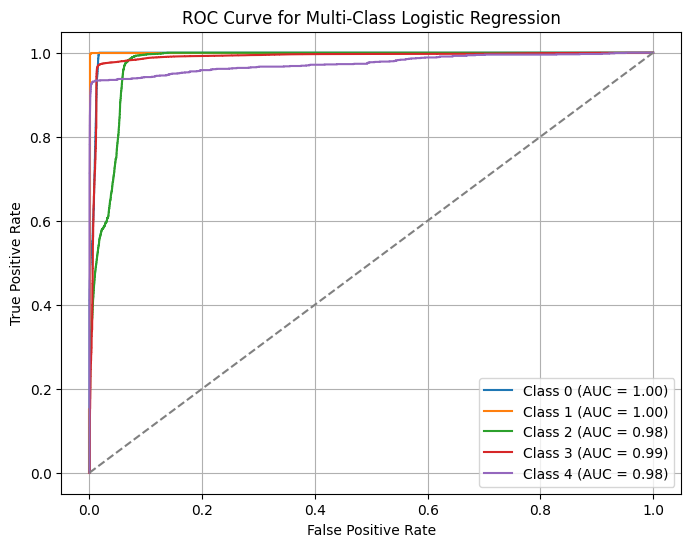

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(cm_logistic.shape[0]):
    fpr_i, tpr_i, _ = roc_curve(Y_test == i, y_pred_proba_logistic[:, i])
    auc = roc_auc_score(Y_test == i, y_pred_proba_logistic[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

## 2.Decision tree:

In [ ]:
tree_model = tree.DecisionTreeClassifier(criterion ="entropy")

In [ ]:
start_time = time.time()
tree_model.fit(X_train_selected , Y_train)
training_time_decision = time.time() - start_time
print(f'training time: {training_time_decision}')

training time: 1.6582059860229492


In [ ]:
#save the model
joblib.dump(tree_model,'/kaggle/working/decisionTree.pkl')

# to load the model:
# loadedModel = joblib.load('/kaggle/working/decisionTree.pkl')

['/kaggle/working/decisionTree.pkl']

In [ ]:
start_time = time.time()
y_pred_tree = tree_model.predict(X_test_selected)
testing_time_decision = time.time() - start_time
print(f'testing time: {testing_time_decision}')

testing time: 0.010825872421264648


In [ ]:
# Get probability predictions for the test set
y_pred_proba_tree = tree_model.predict_proba(X_test_selected)

#### Model's Evaluation:

In [ ]:
accuracy_decision = accuracy_score(Y_test,y_pred_tree)
balanced_accuracy_decision = balanced_accuracy_score(Y_test, y_pred_tree)
precision_decision = precision_score(Y_test, y_pred_tree, average='weighted')
recall_decision = recall_score(Y_test, y_pred_tree, average='weighted')
f1_decision = f1_score(Y_test, y_pred_tree, average='weighted')
roc_auc_decision = roc_auc_score(Y_test, y_pred_proba_tree, average='weighted', multi_class='ovr')
matthews_corrcoef_decision = matthews_corrcoef(Y_test,y_pred_tree)

In [ ]:
print(f"Accuracy: {accuracy_decision}")
print(f"Balanced Accuracy: {balanced_accuracy_decision}")
print(f"Precision: {precision_decision}")
print(f"Recall: {recall_decision}")
print(f"F1-score: {f1_decision}")
print(f"ROC-AUC: {roc_auc_decision}")
print(f"matthews_corrcoef: {matthews_corrcoef_decision}")

Accuracy: 0.9943015760746267
Balanced Accuracy: 0.9697583990629728
Precision: 0.99435667641296
Recall: 0.9943015760746267
F1-score: 0.9943226289659821
ROC-AUC: 0.9848496417885728
matthews_corrcoef: 0.9672068072249199


**The model demonstrates outstanding performance, excelling across various metrics:**
* High Accuracy and Precision show it makes very few errors, particularly in predicting positive cases.
* Strong Recall confirms it detects most of the actual positives.
* F1-Score reflects a balanced approach between precision and recall.
* High ROC-AUC and MCC indicate excellent ability to differentiate between classes and produce reliable, consistent results.

### Two more evaluation metrics:


In [ ]:
cm_decision = confusion_matrix(Y_test, y_pred_tree)
print("Confusion Matrix:\n", cm_decision)

Confusion Matrix:
 [[ 1994     0    13     3     0]
 [    0   633     0    28     1]
 [   18     0  2831    69     1]
 [    2    37    36 67808   131]
 [    0     0     1    87  1240]]


**Class 1 (Row 1):**
* 1994 samples are correctly classified as Class 1.
* 13 samples from Class 1 are misclassified as Class 3.
* 3 samples from Class 1 are misclassified as Class 4.
* 0 samples are misclassified as Class 2 or Class 5.
  
**Class 2 (Row 2):**
* 633 samples are correctly classified as Class 2.
* 28 samples from Class 2 are misclassified as Class 4.
* 1 sample from Class 2 is misclassified as Class 5.
* 0 samples are misclassified as Class 1 or Class 3.
  
**Class 3 (Row 3):**
* 2831 samples are correctly classified as Class 3.
* 18 samples from Class 3 are misclassified as Class 1.
* 69 samples from Class 3 are misclassified as Class 4.
* 1 sample from Class 3 is misclassified as Class 5.
* 0 samples are misclassified as Class 2.
  
**Class 4 (Row 4):**
* 67808 samples are correctly classified as Class 4.
* 2 samples from Class 4 are misclassified as Class 1.
* 37 samples from Class 4 are misclassified as Class 2.
* 36 samples from Class 4 are misclassified as Class 3.
* 131 samples from Class 4 are misclassified as Class 5.
  
**Class 5 (Row 5):**
* 1240 samples are correctly classified as Class 5.
* 0 samples from Class 5 are misclassified as Class 1.
* 1 sample from Class 5 is misclassified as Class 3.
* 87 samples from Class 5 are misclassified as Class 4.


In [ ]:
loss_decision = log_loss(Y_test, y_pred_proba_tree)
print(f"Log Loss: {loss_decision}")

Log Loss: 0.2053920168304097


A Log Loss of 0.205 indicates relatively strong performance, suggesting that the model's predictions are close to the true labels.

In [ ]:
data.loc["decision tree"] = [f"{training_time_decision:.4f}",f"{testing_time_decision:.4f}",f"{accuracy_decision:.4f}",f"{balanced_accuracy_decision:.4f}",f"{precision_decision:.4f}",f"{recall_decision:.4f}",f"{f1_decision:.4f}",f"{roc_auc_decision:.4f}",f"{matthews_corrcoef_decision:.4f}",f"{loss_decision:.4f}"]
data.to_excel('/kaggle/working/modelsEvaluation.xlsx')

In [ ]:
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
tpr_decision = []
fpr_decision = []

# For each class
for i in range(cm_decision.shape[0]):
    tp = cm_decision[i, i]  # True Positive for class i
    fn = cm_decision[i, :].sum() - tp  # False Negatives for class i
    fp = cm_decision[:, i].sum() - tp  # False Positives for class i
    tn = cm_decision.sum() - (tp + fn + fp)  # True Negatives for class i
    
    tpr = tp / (tp + fn)  # True Positive Rate (Recall) for class i
    fpr = fp / (fp + tn)  # False Positive Rate for class i
    
    tpr_decision.append(tpr)
    fpr_decision.append(fpr)

    print(f"Class {i}: TPR = {tpr:.4f}, FPR = {fpr:.4f}")

Class 0: TPR = 0.9920, FPR = 0.0003
Class 1: TPR = 0.9562, FPR = 0.0005
Class 2: TPR = 0.9699, FPR = 0.0007
Class 3: TPR = 0.9970, FPR = 0.0270
Class 4: TPR = 0.9337, FPR = 0.0018


* Overall, the model shows strong performance with high TPR values (above 93% for all classes).
* The FPR values are generally low, indicating that the model does not frequently misclassify instances from other classes as positive for the given class.
* Class 3 has a higher FPR (2.7%), suggesting some misclassification, but its TPR is still very high (99.7%).

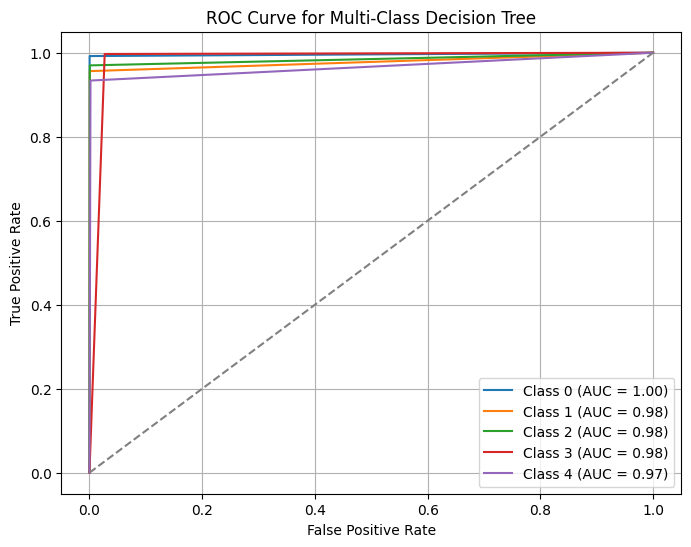

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(cm_decision.shape[0]):
    fpr_i, tpr_i, _ = roc_curve(Y_test == i, y_pred_proba_tree[:, i])
    auc = roc_auc_score(Y_test == i, y_pred_proba_tree[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Decision Tree")
plt.legend()
plt.grid()
plt.show()

## 3.Random forest

In [ ]:
forest_model= RandomForestClassifier()

In [ ]:
start_time = time.time()
forest_model.fit(X_train_selected , Y_train)
training_time_random_forest = time.time() - start_time
print(f'training time: {training_time_random_forest}')

training time: 38.023200273513794


In [ ]:
#save the model
joblib.dump(forest_model,'/kaggle/working/randomForest.pkl')

# to load the model:
# loadedModel = joblib.load('/kaggle/working/randomForest.pkl')

['/kaggle/working/randomForest.pkl']

In [ ]:
start_time = time.time()
y_pred_forest = forest_model.predict(X_test_selected)
testing_time_random_forest = time.time() - start_time
print(f'testing time: {testing_time_random_forest}')

testing time: 1.0555989742279053


In [ ]:
# Get probability predictions for the test set
y_pred_proba_forest = forest_model.predict_proba(X_test_selected)

#### Model's Evaluation:

In [ ]:
accuracy_random_forest = accuracy_score(Y_test,y_pred_forest)
balanced_accuracy_random_forest = balanced_accuracy_score(Y_test, y_pred_forest)
precision_random_forest = precision_score(Y_test, y_pred_forest, average='weighted')
recall_random_forest = recall_score(Y_test, y_pred_forest, average='weighted')
f1_random_forest = f1_score(Y_test, y_pred_forest, average='weighted')
roc_auc_random_forest = roc_auc_score(Y_test, y_pred_proba_forest, average='weighted', multi_class='ovr')
matthews_corrcoef_random_forest = matthews_corrcoef(Y_test,y_pred_forest)

In [ ]:
print(f"Accuracy: {accuracy_random_forest}")
print(f"Balanced Accuracy: {balanced_accuracy_random_forest}")
print(f"Precision: {precision_random_forest}")
print(f"Recall: {recall_random_forest}")
print(f"F1-score: {f1_random_forest}")
print(f"ROC-AUC: {roc_auc_random_forest}")
print(f"matthews_corrcoef: {matthews_corrcoef_random_forest}")

Accuracy: 0.9971574606648607
Balanced Accuracy: 0.9814898252331858
Precision: 0.997187267128354
Recall: 0.9971574606648607
F1-score: 0.9971455628852834
ROC-AUC: 0.9966026274495612
matthews_corrcoef: 0.9835800885998125


**the Random Forest model exhibits outstanding performance across all metrics**
* High Overall Performance
* The balanced accuracy and F1-score indicate that the model is effective across all classes, with no significant bias toward any particular class.
* The ROC-AUC and MCC scores suggest that the model not only differentiates between classes effectively but also maintains a strong correlation between predictions and actual outcomes.
* Reliable Predictions: The high precision and recall scores confirm that the model reliably detects positives while minimizing false positives and negatives, which is crucial for many applications.

In [ ]:
cm_random_forest = confusion_matrix(Y_test, y_pred_forest)
print("Confusion Matrix:\n", cm_random_forest)

Confusion Matrix:
 [[ 2003     0     7     0     0]
 [    0   658     0     4     0]
 [   17     0  2882    20     0]
 [    2    45    19 67941     7]
 [    0     0     0    92  1236]]


**Class 1 (Row 1):**
* 2003 samples are correctly classified as Class 1.
* 7 samples from Class 1 are misclassified as Class 3.
* No misclassifications to other classes (Class 2, 4, 5).

**Class 2 (Row 2):**
* 658 samples are correctly classified as Class 2.
* 4 samples from Class 2 are misclassified as Class 4.
* No misclassifications to other classes (Class 1, 3, 5).

**Class 3 (Row 3):**
* 2882 samples are correctly classified as Class 3.
* 17 samples from Class 3 are misclassified as Class 1.
* 20 samples from Class 3 are misclassified as Class 4.
* No misclassifications to Class 2 or Class 5.

**Class 4 (Row 4):**
* 67941 samples are correctly classified as Class 4.
* 2 samples from Class 4 are misclassified as Class 1.
* 45 samples from Class 4 are misclassified as Class 2.
* 19 samples from Class 4 are misclassified as Class 3.
* 7 samples from Class 4 are misclassified as Class 5.
 
**Class 5 (Row 5):**
* 1236 samples are correctly classified as Class 5.
* 92 samples from Class 5 are misclassified as Class 4.
* No misclassifications to other classes (Class 1, 2, 3).

In [ ]:
loss_random_forest = log_loss(Y_test, y_pred_proba_forest)
print(f"Log Loss: {loss_random_forest}")

Log Loss: 0.02962299618135279


A Log Loss of 0.0296 is extremely low and indicates that the model is doing a very good job at predicting probabilities that are very close to the actual classes.

In [ ]:
data.loc["Random Forest"] = [f"{training_time_random_forest:.4f}",f"{testing_time_random_forest:.4f}",f"{accuracy_random_forest:.4f}",f"{balanced_accuracy_random_forest:.4f}",f"{precision_random_forest:.4f}",f"{recall_random_forest:.4f}",f"{f1_random_forest:.4f}",f"{roc_auc_random_forest:.4f}",f"{matthews_corrcoef_random_forest:.4f}",f"{loss_random_forest:.4f}"]
data.to_excel('/kaggle/working/modelsEvaluation.xlsx')

In [ ]:
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
tpr_random_forest = []
fpr_random_forest = []

# For each class
for i in range(cm_random_forest.shape[0]):
    tp = cm_random_forest[i, i]  # True Positive for class i
    fn = cm_random_forest[i, :].sum() - tp  # False Negatives for class i
    fp = cm_random_forest[:, i].sum() - tp  # False Positives for class i
    tn = cm_random_forest.sum() - (tp + fn + fp)  # True Negatives for class i
    
    tpr = tp / (tp + fn)  # True Positive Rate (Recall) for class i
    fpr = fp / (fp + tn)  # False Positive Rate for class i
    
    tpr_random_forest.append(tpr)
    fpr_random_forest.append(fpr)

    print(f"Class {i}: TPR = {tpr:.4f}, FPR = {fpr:.4f}")

Class 0: TPR = 0.9965, FPR = 0.0003
Class 1: TPR = 0.9940, FPR = 0.0006
Class 2: TPR = 0.9873, FPR = 0.0004
Class 3: TPR = 0.9989, FPR = 0.0168
Class 4: TPR = 0.9307, FPR = 0.0001


* The model performs exceptionally well across all classes, with high TPRs (above 93%) for each class.
* Class 3 has a slightly higher FPR (1.68%) compared to other classes, indicating that the model may misclassify some instances from other classes as Class 3.
* Class 0, Class 1, Class 2, and Class 4 show very low FPRs, indicating very few misclassifications.
* Overall, the model exhibits strong performance in identifying the correct class with low misclassification rates.

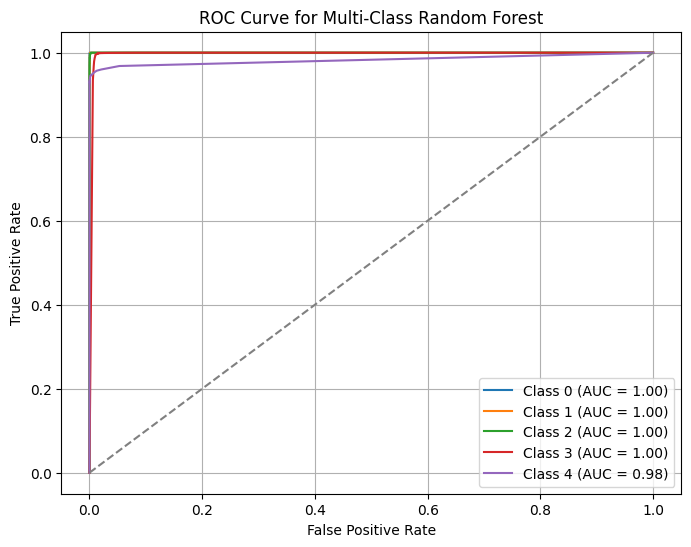

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(cm_random_forest.shape[0]):
    fpr_i, tpr_i, _ = roc_curve(Y_test == i, y_pred_proba_forest[:, i])
    auc = roc_auc_score(Y_test == i, y_pred_proba_forest[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Random Forest")
plt.legend()
plt.grid()
plt.show()

## 4.SVM

In [ ]:
svm_model = LinearSVC(random_state=42)

In [ ]:
start_time = time.time()
svm_model.fit(X_train_selected , Y_train)
training_time_svm = time.time() - start_time
print(f'training time: {training_time_svm}')

training time: 6.272641897201538


In [ ]:
#save the model
joblib.dump(svm_model,'/kaggle/working/svm.pkl')

# to load the model:
# loadedModel = joblib.load('/kaggle/working/svm.pkl')

['/kaggle/working/svm.pkl']

In [ ]:
start_time = time.time()
y_pred_svm = svm_model.predict(X_test_selected)
testing_time_svm = time.time() - start_time
print(f'testing time: {testing_time_svm}')

testing time: 0.009301185607910156


In [ ]:
# Get probability predictions for the test set
y_pred_proba_svm = svm_model._predict_proba_lr(X_test_selected)

#### Model's Evaluation:

In [ ]:
accuracy_svm = accuracy_score(Y_test,y_pred_svm)
balanced_accuracy_svm = balanced_accuracy_score(Y_test, y_pred_svm)
precision_svm = precision_score(Y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(Y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(Y_test, y_pred_svm, average='weighted')
roc_auc_svm = roc_auc_score(Y_test, y_pred_proba_svm, average='weighted', multi_class='ovr')
matthews_corrcoef_svm = matthews_corrcoef(Y_test,y_pred_svm)

In [ ]:
print(f"Accuracy: {accuracy_svm}")
print(f"Balanced Accuracy: {balanced_accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-score: {f1_svm}")
print(f"ROC-AUC: {roc_auc_svm}")
print(f"matthews_corrcoef: {matthews_corrcoef_svm}")

Accuracy: 0.9663699571617311
Balanced Accuracy: 0.8117597119478986
Precision: 0.9641919106452549
Recall: 0.9663699571617311
F1-score: 0.9644335461717329
ROC-AUC: 0.9887778272837883
matthews_corrcoef: 0.7990976781797772


* High Overall Accuracy: The model performs very well with 96.64% accuracy, showing strong overall performance.
* Balanced Performance Across Classes: The balanced accuracy of 81.18% indicates that the model performs well across all classes, although there may still be some imbalance. The model is not overly biased towards the majority class.
* Good Precision and Recall: The model exhibits high precision (96.42%) and recall (96.64%), meaning it is both effective at detecting positive instances and avoiding false positives.
* Strong Discriminatory Power: The ROC-AUC of 98.88% suggests that the model does a great job of distinguishing between different classes.
* Reliable Predictions: The Matthews Correlation Coefficient of 79.91% indicates that the model's predictions are reliable and show strong correlation with the actual outcomes.

In [ ]:
cm_svm = confusion_matrix(Y_test, y_pred_svm)
print("Confusion Matrix:\n", cm_svm)

Confusion Matrix:
 [[ 1589     0   409    12     0]
 [    2   612    37    11     0]
 [  779     0  1354   786     0]
 [    3    58   266 67683     4]
 [    4     0     3   146  1175]]


**Class 1 (Row 1):**
* 1589 samples are correctly classified as Class 1.
* 409 samples from Class 1 are misclassified as Class 3.
* 12 samples from Class 1 are misclassified as Class 4.
* No misclassifications to other classes (Class 2, 5).

**Class 2 (Row 2):**
* 612 samples are correctly classified as Class 2.
* 37 samples from Class 2 are misclassified as Class 3.
* 11 samples from Class 2 are misclassified as Class 4.
* 2 samples from Class 2 are misclassified as Class 1.
* No misclassifications to Class 5.

**Class 3 (Row 3):**
* 1354 samples are correctly classified as Class 3.
* 779 samples from Class 3 are misclassified as Class 1.
* 786 samples from Class 3 are misclassified as Class 4.
* No misclassifications to Class 2 or Class 5.

**Class 4 (Row 4):**
* 67683 samples are correctly classified as Class 4.
* 58 samples from Class 4 are misclassified as Class 2.
* 266 samples from Class 4 are misclassified as Class 3.
* 4 samples from Class 4 are misclassified as Class 5.
* 3 samples from Class 4 are misclassified as Class 1.

**Class 5 (Row 5):**
* 1175 samples are correctly classified as Class 5.
* 146 samples from Class 5 are misclassified as Class 4.
* 3 samples from Class 5 are misclassified as Class 3.
* 4 samples from Class 5 are misclassified as Class 1.
* No misclassifications to Class 2.

In [ ]:
loss_svm = log_loss(Y_test, y_pred_proba_svm)
print(f"Log Loss: {loss_svm}")

Log Loss: 0.5312060128233769


A Log Loss of 0.5312 suggests moderate model performance. It is not a perfect score (which would be close to 0), but it is relatively good, indicating that the model is making reasonable predictions on the dataset.

In [ ]:
data.loc["SVM"] = [f"{training_time_svm:.4f}",f"{testing_time_svm:.4f}",f"{accuracy_svm:.4f}",f"{balanced_accuracy_svm:.4f}",f"{precision_svm:.4f}",f"{recall_svm:.4f}",f"{f1_svm:.4f}",f"{roc_auc_svm:.4f}",f"{matthews_corrcoef_svm:.4f}",f"{loss_svm:.4f}"]
data.to_excel('/kaggle/working/modelsEvaluation.xlsx')

In [ ]:
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
tpr_svm = []
fpr_svm = []

# For each class
for i in range(cm_svm.shape[0]):
    tp = cm_svm[i, i]  # True Positive for class i
    fn = cm_svm[i, :].sum() - tp  # False Negatives for class i
    fp = cm_svm[:, i].sum() - tp  # False Positives for class i
    tn = cm_svm.sum() - (tp + fn + fp)  # True Negatives for class i
    
    tpr = tp / (tp + fn)  # True Positive Rate (Recall) for class i
    fpr = fp / (fp + tn)  # False Positive Rate for class i
    
    tpr_svm.append(tpr)
    fpr_svm.append(fpr)

    print(f"Class {i}: TPR = {tpr:.4f}, FPR = {fpr:.4f}")

Class 0: TPR = 0.7905, FPR = 0.0108
Class 1: TPR = 0.9245, FPR = 0.0008
Class 2: TPR = 0.4639, FPR = 0.0099
Class 3: TPR = 0.9951, FPR = 0.1380
Class 4: TPR = 0.8848, FPR = 0.0001


* Class 1 and Class 4 exhibit very high TPRs (over 92%) and very low FPRs (near zero), indicating strong performance and very few misclassifications.
* Class 0 has a moderate TPR (79.05%) and a low FPR (1.08%), meaning the model does well but could be improved in identifying this class more accurately.
* Class 2 has a relatively low TPR (46.39%) and a low FPR (0.99%), suggesting that the model struggles more to correctly classify instances from this class.
* Class 3 has an outstanding TPR (99.51%) but a very high FPR (13.8%), indicating that although the model is highly accurate in identifying Class 3, it often incorrectly classifies instances from other classes as Class 3.

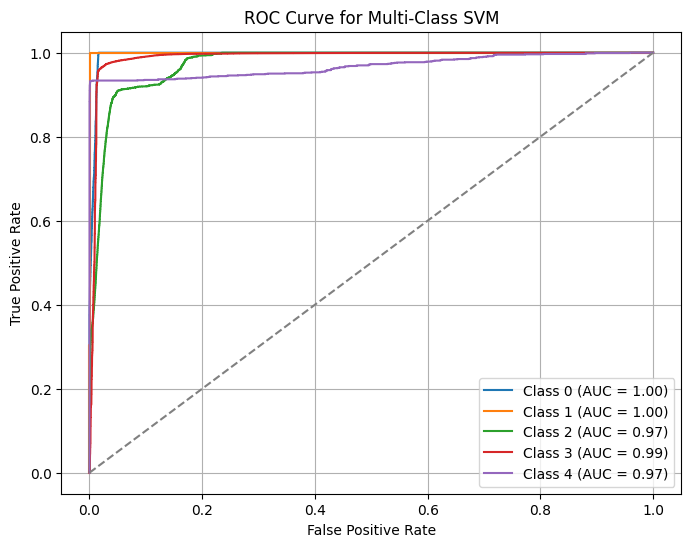

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(cm_svm.shape[0]):
    fpr_i, tpr_i, _ = roc_curve(Y_test == i, y_pred_proba_svm[:, i])
    auc = roc_auc_score(Y_test == i, y_pred_proba_svm[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class SVM")
plt.legend()
plt.grid()
plt.show()

## 5.KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7) 

In [ ]:
start_time = time.time()
knn_model.fit(X_train_selected , Y_train)
training_time_knn = time.time() - start_time
print(f'training time: {training_time_knn}')

training time: 1.1890654563903809


In [ ]:
#save the model 
joblib.dump(knn_model,'/kaggle/working/knn.pkl')

# to load the model:
# loadedModel = joblib.load('/kaggle/working/knn.pkl')

['/kaggle/working/knn.pkl']

In [ ]:
start_time = time.time()
y_pred_knn = knn_model.predict(X_test_selected)
testing_time_knn = time.time() - start_time
print(f'testing time: {testing_time_knn}')

testing time: 38.32289409637451


In [ ]:
# Get probability predictions for the test set
y_pred_proba_knn = knn_model.predict_proba(X_test_selected)

#### Model's Evaluation:

In [ ]:
accuracy_knn = accuracy_score(Y_test,y_pred_knn)
balanced_accuracy_knn = balanced_accuracy_score(Y_test, y_pred_knn)
precision_knn = precision_score(Y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(Y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(Y_test, y_pred_knn, average='weighted')
roc_auc_knn = roc_auc_score(Y_test, y_pred_proba_knn, average='weighted', multi_class='ovr')
matthews_corrcoef_knn = matthews_corrcoef(Y_test,y_pred_knn)

In [ ]:
print(f"Accuracy: {accuracy_knn}")
print(f"Balanced Accuracy: {balanced_accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-score: {f1_knn}")
print(f"ROC-AUC: {roc_auc_knn}")
print(f"matthews_corrcoef: {matthews_corrcoef_knn}")

Accuracy: 0.9939145636768847
Balanced Accuracy: 0.9544687394110337
Precision: 0.9938890327293729
Recall: 0.9939145636768847
F1-score: 0.9938743924497164
ROC-AUC: 0.9926833192840641
matthews_corrcoef: 0.9646928432641346


* High Accuracy: The model performs with 99.39% accuracy, which is exceptional, showing that it is largely correct in its predictions.
* Well-Balanced Across Classes: The balanced accuracy of 95.45% demonstrates that the model performs well across all classes, indicating no significant bias toward the majority class.
* Great Precision and Recall: The precision (99.39%) and recall (99.39%) scores are both very high, which means the model is good at both minimizing false positives and accurately detecting positive instances.
* Strong Discrimination Power: The ROC-AUC score of 99.27% shows that the model is excellent at distinguishing between classes.
* Reliable Predictions: The MCC value of 96.47% indicates a strong positive correlation between the predicted and actual labels, suggesting that the model is robust and consistent in its predictions.

In [ ]:
cm_knn = confusion_matrix(Y_test, y_pred_knn)
print("Confusion Matrix:\n", cm_knn)

Confusion Matrix:
 [[ 1964     0    38     0     8]
 [    1   619     3    39     0]
 [   48     2  2786    79     4]
 [    2    48    49 67903    12]
 [    5     0     9   109  1205]]


**Class 1 (Row 1):**
* 1964 samples are correctly classified as Class 1.
* 38 samples from Class 1 are misclassified as Class 3.
* 8 samples from Class 1 are misclassified as Class 5.
* 0 samples misclassified as Class 2 or Class 4.

**Class 2 (Row 2):**
* 619 samples are correctly classified as Class 2.
* 3 samples from Class 2 are misclassified as Class 3.
* 39 samples from Class 2 are misclassified as Class 4.
* 1 sample from Class 2 is misclassified as Class 1.
* No misclassifications to Class 5.

**Class 3 (Row 3):**
* 2786 samples are correctly classified as Class 3.
* 48 samples from Class 3 are misclassified as Class 1.
* 79 samples from Class 3 are misclassified as Class 4.
* 4 samples from Class 3 are misclassified as Class 5.
* No misclassifications to Class 2.

**Class 4 (Row 4):**
* 67903 samples are correctly classified as Class 4.
* 48 samples from Class 4 are misclassified as Class 2.
* 49 samples from Class 4 are misclassified as Class 3.
* 12 samples from Class 4 are misclassified as Class 5.
* 2 samples from Class 4 are misclassified as Class 1.

**Class 5 (Row 5):**
* 1205 samples are correctly classified as Class 5.
* 109 samples from Class 5 are misclassified as Class 4.
* 9 samples from Class 5 are misclassified as Class 3.
* 5 samples from Class 5 are misclassified as Class 1.
* No misclassifications to Class 2.

In [ ]:
loss_Knn = log_loss(Y_test, y_pred_proba_knn)
print(f"Log Loss: {loss_Knn}")

Log Loss: 0.07324592855449853


A Log Loss of 0.0732 is very low, which suggests that the model's predictions are very confident and accurate. 

In [ ]:
data.loc["KNN"] = [f"{training_time_knn:.4f}",f"{testing_time_knn:.4f}",f"{accuracy_knn:.4f}",f"{balanced_accuracy_knn:.4f}",f"{precision_knn:.4f}",f"{recall_knn:.4f}",f"{f1_knn:.4f}",f"{roc_auc_knn:.4f}",f"{matthews_corrcoef_knn:.4f}",f"{loss_Knn:.4f}"]
data.to_excel('/kaggle/working/modelsEvaluation.xlsx')

In [ ]:
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
tpr_knn = []
fpr_knn = []

# For each class
for i in range(cm_knn.shape[0]):
    tp = cm_knn[i, i]  # True Positive for class i
    fn = cm_knn[i, :].sum() - tp  # False Negatives for class i
    fp = cm_knn[:, i].sum() - tp  # False Positives for class i
    tn = cm_knn.sum() - (tp + fn + fp)  # True Negatives for class i
    
    tpr = tp / (tp + fn)  # True Positive Rate (Recall) for class i
    fpr = fp / (fp + tn)  # False Positive Rate for class i
    
    tpr_knn.append(tpr)
    fpr_knn.append(fpr)

    print(f"Class {i}: TPR = {tpr:.4f}, FPR = {fpr:.4f}")

Class 0: TPR = 0.9771, FPR = 0.0008
Class 1: TPR = 0.9350, FPR = 0.0007
Class 2: TPR = 0.9544, FPR = 0.0014
Class 3: TPR = 0.9984, FPR = 0.0328
Class 4: TPR = 0.9074, FPR = 0.0003


* The model performs very well across all classes, with high TPR values (above 90%) for each class, indicating strong accuracy in identifying the correct class.
* Class 3 has the highest TPR (99.84%) but also a relatively high FPR (3.28%), suggesting that while it is very accurate at detecting Class 3, it may misclassify other classes as Class 3 more frequently than the other classes.
* Class 0, Class 1, Class 2, and Class 4 all show very low FPRs, indicating that the model rarely misclassifies instances from other classes as these classes.

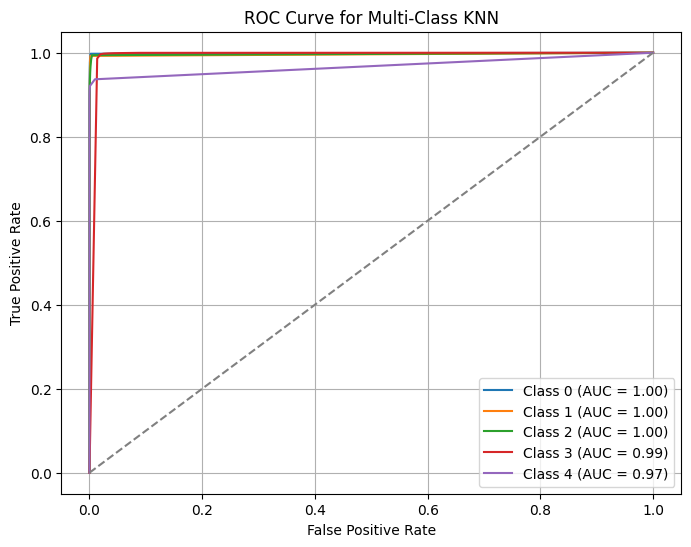

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(cm_knn.shape[0]):
    fpr_i, tpr_i, _ = roc_curve(Y_test == i, y_pred_proba_knn[:, i])
    auc = roc_auc_score(Y_test == i, y_pred_proba_knn[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class KNN")
plt.legend()
plt.grid()
plt.show()

## 6.Neural Network:

In [ ]:
input_dim=X_train_selected.shape[1]
print(input_dim)

13


In [ ]:
nn_model = Sequential([
    Dense(128, activation='relu',input_shape=(input_dim,)),  # Input layer with 128 neurons
    Dropout(0.2),  # Dropout for regularization to decrease overfiting
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.2),
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dropout(0.2),
    Dense(len(uniqueClasses), activation='softmax')  # Output layer with softmax for classification
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
nn_model.compile(optimizer='adam',  # Adaptive Moment Estimation optimizer
                 loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
                 metrics=['accuracy'])

In [ ]:
# Train the model
start_time = time.time()
nn_history = nn_model.fit(X_train_selected, Y_train, 
                          epochs=10,  # Number of epochs
                          batch_size=32,  # Batch size
                          validation_split=0.2,  # Use 20% of the training data for validation
                          verbose=1)
training_time_nn = time.time() - start_time
print(f'Training time: {training_time_nn:.2f} seconds')


Epoch 1/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9542 - loss: 0.1281 - val_accuracy: 0.9783 - val_loss: 0.0441
Epoch 2/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9787 - loss: 0.0478 - val_accuracy: 0.9805 - val_loss: 0.0398
Epoch 3/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9791 - loss: 0.0439 - val_accuracy: 0.9808 - val_loss: 0.0392
Epoch 4/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9795 - loss: 0.0434 - val_accuracy: 0.9803 - val_loss: 0.0407
Epoch 5/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9795 - loss: 0.0428 - val_accuracy: 0.9807 - val_loss: 0.0380
Epoch 6/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9802 - loss: 0.0420 - val_accuracy: 0.9810 - val_loss: 0.0377
Epoch 7/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9806 - loss: 0.0413 - val_accuracy: 0.9814 - val_loss: 0.0368
Epoch 8/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9806 - loss: 0

In [ ]:
# Save the model
joblib.dump(nn_model,'/kaggle/working/NN.pkl')

['/kaggle/working/NN.pkl']

In [ ]:
# Evaluate the model on the test set
start_time = time.time()
test_loss, test_accuracy = nn_model.evaluate(X_test_selected, Y_test)
testing_time_nn = time.time() - start_time
print(f'Testing time: {testing_time_nn:.2f} seconds')
print(f'Test Accuracy: {test_accuracy:.4f}')

2342/2342 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9818 - loss: 0.0373
Testing time: 2.88 seconds
Test Accuracy: 0.9822


In [ ]:
# Predict on the test set
y_pred_nn = nn_model.predict(X_test_selected)
y_pred_classes = y_pred_nn.argmax(axis=-1)


2342/2342 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
y_pred_nn

array([[6.4546675e-14, 7.9414111e-09, 1.5467798e-09, 9.9796665e-01,
        2.0334215e-03],
       [1.1319224e-13, 8.5330969e-09, 2.2830295e-09, 9.9787146e-01,
        2.1285526e-03],
       [2.6564984e-14, 4.1044510e-09, 9.6271913e-10, 9.9793226e-01,
        2.0677252e-03],
       ...,
       [3.4094053e-32, 1.3602062e-21, 2.1609409e-18, 9.9999928e-01,
        7.1825156e-07],
       [6.3487572e-13, 2.4526939e-08, 5.9462053e-09, 9.9763489e-01,
        2.3651202e-03],
       [1.0660597e-04, 3.2379207e-11, 9.9875605e-01, 3.7128074e-04,
        7.6611206e-04]], dtype=float32)

In [ ]:
y_pred_classes

array([3, 3, 3, ..., 3, 3, 2])

#### Model's Evaluation:

In [ ]:
accuracy_nn = accuracy_score(Y_test, y_pred_classes)
balanced_accuracy_nn = balanced_accuracy_score(Y_test, y_pred_classes)
precision_nn = precision_score(Y_test, y_pred_classes, average='weighted')
recall_nn = recall_score(Y_test, y_pred_classes, average='weighted')
f1_nn = f1_score(Y_test, y_pred_classes, average='weighted')
roc_auc_nn = roc_auc_score(Y_test, y_pred_nn, multi_class='ovr')
mcc_nn = matthews_corrcoef(Y_test, y_pred_classes)


In [ ]:
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-score: {f1_nn:.4f}")
print(f"ROC-AUC: {roc_auc_nn:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_nn:.4f}")

Accuracy: 0.9822
Balanced Accuracy: 0.9055
Precision: 0.9851
Recall: 0.9822
F1-score: 0.9822
ROC-AUC: 0.9943
Matthews Correlation Coefficient: 0.8983


* High Accuracy: The model achieves an excellent 98.22% accuracy, showing it performs very well overall.
* Good Balanced Performance: The balanced accuracy of 90.55% suggests that the model is effective at handling both majority and minority classes, making it robust in dealing with class imbalances.
* Excellent Precision and Recall: The precision (98.51%) and recall (98.22%) scores are both very high, indicating that the model is both accurate when it predicts positive instances and effective at identifying positive instances.
* Strong Discriminatory Power: The ROC-AUC of 99.43% indicates that the model is great at distinguishing between different classes, which is essential for tasks involving classification.
* High Consistency: The MCC score of 89.83% shows that the model has a strong and consistent correlation between predicted and actual values, further validating its overall performance.

In [ ]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(Y_test, y_pred_classes, target_names=encoder.categories_[0]))


Classification Report:

              precision    recall  f1-score   support

   Blackhole       0.67      0.94      0.78      2010
    Flooding       0.91      1.00      0.95       662
    Grayhole       0.92      0.66      0.77      2919
      Normal       1.00      1.00      1.00     68014
        TDMA       0.99      0.93      0.96      1328

    accuracy                           0.98     74933
   macro avg       0.90      0.91      0.89     74933
weighted avg       0.99      0.98      0.98     74933



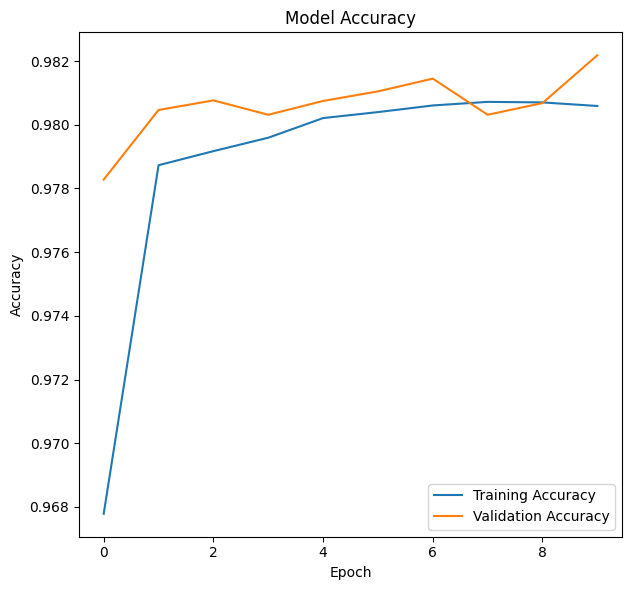

In [ ]:
# Assuming 'history' is the variable that stores the training history
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
# Show the plots
plt.tight_layout()
plt.show()

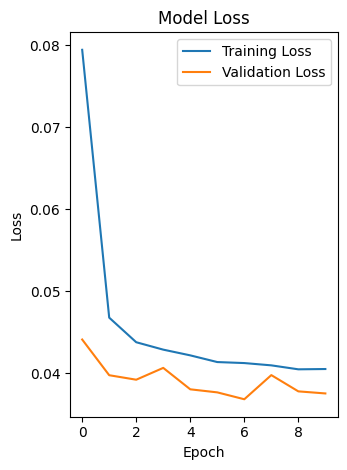

In [ ]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
cm_NN = confusion_matrix(Y_test, y_pred_classes)
print("Confusion Matrix:\n", cm_NN)

Confusion Matrix:
 [[ 1891     0   118     0     1]
 [    0   660     0     2     0]
 [  948     0  1941    27     3]
 [    1    68    59 67877     9]
 [    0     0     1    96  1231]]


**Class 1 (Row 1):**
* 1891 instances of Class 1 are correctly classified as Class 1.
* 118 instances of Class 1 are misclassified as Class 3.
* 1 instance of Class 1 is misclassified as Class 5.
* No misclassifications to Class 2 or Class 4.

**Class 2 (Row 2):**
* 660 instances of Class 2 are correctly classified as Class 2.
* 2 instances of Class 2 are misclassified as Class 4.
* No misclassifications to Class 1, Class 3, or Class 5.

**Class 3 (Row 3):**
* 1941 instances of Class 3 are correctly classified as Class 3.
* 948 instances of Class 3 are misclassified as Class 1.
* 27 instances of Class 3 are misclassified as Class 4.
* 3 instances of Class 3 are misclassified as Class 5.
* No misclassification to Class 2.

**Class 4 (Row 4):**
* 67877 instances of Class 4 are correctly classified as Class 4.
* 68 instances of Class 4 are misclassified as Class 2.
* 59 instances of Class 4 are misclassified as Class 3.
* 9 instances of Class 4 are misclassified as Class 5.
* 1 instance of Class 4 is misclassified as Class 1.

**Class 5 (Row 5):**
* 1231 instances of Class 5 are correctly classified as Class 5.
* 96 instances of Class 5 are misclassified as Class 4.
* 1 instance of Class 5 is misclassified as Class 3.
* 0 misclassifications to Class 1 or Class 2.

In [ ]:
loss_NN = log_loss(Y_test, y_pred_nn)
print(f"Log Loss: {loss_NN}")

Log Loss: 0.03801969376409092


Log Loss of 0.0380 is very low, which suggests that the model is highly confident in its predictions and making very accurate decisions.

In [ ]:
data.loc["NN"] = [f"{training_time_nn:.4f}",
                  f"{testing_time_nn:.4f}",
                  f"{accuracy_nn:.4f}",
                  f"{balanced_accuracy_nn:.4f}",
                  f"{precision_nn:.4f}",
                  f"{recall_nn:.4f}",f"{f1_nn:.4f}",
                  f"{roc_auc_nn:.4f}",
                  f"{mcc_nn:.4f}",
                  f"{loss_NN:.4f}"]
data.to_excel('/kaggle/working/modelsEvaluation.xlsx')

In [ ]:
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
tpr_nn = []
fpr_nn = []

# For each class
for i in range(cm_NN.shape[0]):
    tp = cm_NN[i, i]  # True Positive for class i
    fn = cm_NN[i, :].sum() - tp  # False Negatives for class i
    fp = cm_NN[:, i].sum() - tp  # False Positives for class i
    tn = cm_NN.sum() - (tp + fn + fp)  # True Negatives for class i
    
    tpr = tp / (tp + fn)  # True Positive Rate (Recall) for class i
    fpr = fp / (fp + tn)  # False Positive Rate for class i
    
    tpr_nn.append(tpr)
    fpr_nn.append(fpr)

    print(f"Class {i}: TPR = {tpr:.4f}, FPR = {fpr:.4f}")

Class 0: TPR = 0.9408, FPR = 0.0130
Class 1: TPR = 0.9970, FPR = 0.0009
Class 2: TPR = 0.6650, FPR = 0.0025
Class 3: TPR = 0.9980, FPR = 0.0181
Class 4: TPR = 0.9270, FPR = 0.0002


* Class 1 and Class 3 perform exceptionally well with high TPR (99.70% and 99.80%), though Class 3 has a relatively high FPR (1.81%) compared to the others. This means the model is highly effective in identifying these classes but has a moderate level of misclassifications for Class 3.
* Class 0 and Class 4 also perform well, with TPR values of 94.08% and 92.70%, respectively. Both classes have low FPRs, indicating that the model does a good job distinguishing these classes from others.
* Class 2 has the lowest TPR (66.50%), suggesting that the model struggles more to identify this class. However, the FPR (0.25%) is relatively low, so the model's misclassification of other classes as Class 2 is not as frequent.

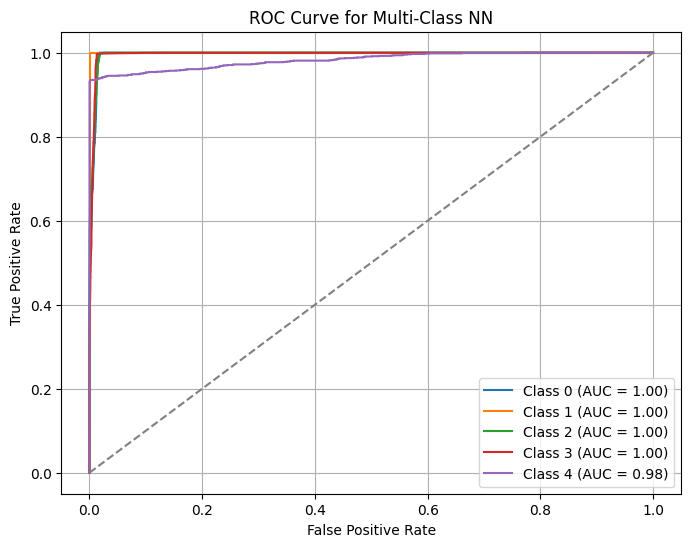

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(cm_NN.shape[0]):
    fpr_i, tpr_i, _ = roc_curve(Y_test == i, y_pred_nn[:, i])
    auc = roc_auc_score(Y_test == i, y_pred_nn[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class NN")
plt.legend()
plt.grid()
plt.show()

## 7.CNN:

In [ ]:
X_train_selected2=X_train_selected.values
X_train_selected2 = X_train_selected2[..., np.newaxis] #3shan x tb2a 3D ha7ot dimension zyada
X_train_selected2.shape

(299728, 13, 1)

In [ ]:
X_test_selected2=X_test_selected.values
X_test_selected2 = X_test_selected2[..., np.newaxis] #3shan x tb2a 3D ha7ot dimension zyada
X_test_selected2.shape

(74933, 13, 1)

In [ ]:
# CNN architecture 
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_selected2.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(Y_train)), activation='softmax')  
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start_time = time.time()
history = model.fit(X_train_selected2, Y_train, epochs=10, batch_size=32, validation_split=0.2)
training_time_CNN = time.time() - start_time
print(f'Training time: {training_time_CNN:.2f} seconds')


Epoch 1/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9466 - loss: 0.1551 - val_accuracy: 0.9774 - val_loss: 0.0551
Epoch 2/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9742 - loss: 0.0609 - val_accuracy: 0.9780 - val_loss: 0.0492
Epoch 3/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9768 - loss: 0.0560 - val_accuracy: 0.9799 - val_loss: 0.0452
Epoch 4/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9778 - loss: 0.0527 - val_accuracy: 0.9786 - val_loss: 0.0461
Epoch 5/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9794 - loss: 0.0498 - val_accuracy: 0.9855 - val_loss: 0.0420
Epoch 6/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9815 - loss: 0.0470 - val_accuracy: 0.9852 - val_loss: 0.0393
Epoch 7/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9818 - loss: 0.0460 - val_accuracy: 0.9866 - val_loss: 0.0371
Epoch 8/10
7494/7494 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9828 - loss: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_selected2, Y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

2342/2342 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9872 - loss: 0.0364
Test Accuracy: 0.9873


In [ ]:
start_time = time.time()
predictions = model.predict(X_test_selected2)
testing_time_CNN = time.time() - start_time
print(f'Testing time: {testing_time_CNN:.2f} seconds')

2342/2342 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Testing time: 4.48 seconds


In [ ]:
y_pred_cnn = np.argmax(predictions, axis=1)

#### Model's Evaluation:

In [ ]:
accuracy_cnn = accuracy_score(Y_test, y_pred_cnn)
balanced_accuracy_cnn = balanced_accuracy_score(Y_test, y_pred_cnn)
precision_cnn = precision_score(Y_test, y_pred_cnn, average='weighted')
recall_cnn = recall_score(Y_test, y_pred_cnn, average='weighted')
f1_cnn = f1_score(Y_test, y_pred_cnn, average='weighted')
roc_auc_cnn = roc_auc_score(Y_test, predictions, multi_class='ovr')
mcc_cnn = matthews_corrcoef(Y_test, y_pred_cnn)

In [ ]:
print(f"Accuracy: {accuracy_cnn:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_cnn:.4f}")
print(f"Precision: {precision_cnn:.4f}")
print(f"Recall: {recall_cnn:.4f}")
print(f"F1-score: {f1_cnn:.4f}")
print(f"ROC-AUC: {roc_auc_cnn:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_cnn:.4f}")

Accuracy: 0.9873
Balanced Accuracy: 0.9206
Precision: 0.9878
Recall: 0.9873
F1-score: 0.9872
ROC-AUC: 0.9947
Matthews Correlation Coefficient: 0.9271


* High Accuracy: With an accuracy of 98.73%, the model performs very well overall, correctly predicting most instances.
* Good Balanced Performance: The balanced accuracy of 92.06% highlights the model's effectiveness across all classes, especially in the presence of potential class imbalances.
* Strong Precision and Recall: The model's precision (98.78%) and recall (98.73%) are nearly identical, meaning it is both highly accurate when predicting positive instances and effective at identifying positive instances.
* Impressive ROC-AUC: The ROC-AUC score of 99.47% demonstrates that the model can effectively distinguish between the positive and negative classes with excellent discriminatory power.
* Excellent MCC: The MCC of 92.71% reflects strong, consistent performance, showing a high correlation between predicted and actual labels.

In [ ]:
cm_cnn = confusion_matrix(Y_test, y_pred_cnn)
print("Confusion Matrix:\n", cm_cnn)

Confusion Matrix:
 [[ 1515     0   495     0     0]
 [    0   659     0     3     0]
 [  182     0  2708    29     0]
 [    5    67    71 67868     3]
 [    1     0     1    93  1233]]


**Class 1 (Row 1):**
* 1515 instances of Class 1 are correctly classified as Class 1.
* 495 instances of Class 1 are misclassified as Class 3.
* No misclassifications to Class 2, Class 4, or Class 5.

**Class 2 (Row 2):**
* 659 instances of Class 2 are correctly classified as Class 2.
* 3 instances of Class 2 are misclassified as Class 4.
* No misclassifications to Class 1, Class 3, or Class 5.

**Class 3 (Row 3):**
* 2708 instances of Class 3 are correctly classified as Class 3.
* 182 instances of Class 3 are misclassified as Class 1.
* 29 instances of Class 3 are misclassified as Class 4.
* No misclassifications to Class 2 or Class 5.

**Class 4 (Row 4):**
* 67868 instances of Class 4 are correctly classified as Class 4.
* 67 instances of Class 4 are misclassified as Class 2.
* 71 instances of Class 4 are misclassified as Class 3.
* 3 instances of Class 4 are misclassified as Class 5.
* 5 instances of Class 4 are misclassified as Class 1.

**Class 5 (Row 5):**
* 1233 instances of Class 5 are correctly classified as Class 5.
* 93 instances of Class 5 are misclassified as Class 4.
* 1 instance of Class 5 is misclassified as Class 1.
* 1 instance of Class 5 is misclassified as Class 3.
* No misclassifications to Class 2.

In [ ]:
loss_cnn = log_loss(Y_test, predictions)
print(f"Log Loss: {loss_cnn}")

Log Loss: 0.03660317919467629


Log Loss of 0.0366 is very low, which suggests that the model's predicted probabilities are very close to the true class labels

In [ ]:
data.loc["CNN"] = [f"{training_time_CNN:.4f}",
                  f"{testing_time_CNN:.4f}",
                  f"{accuracy_cnn:.4f}",
                  f"{balanced_accuracy_cnn:.4f}",
                  f"{precision_cnn:.4f}",
                  f"{recall_cnn:.4f}",f"{f1_nn:.4f}",
                  f"{roc_auc_cnn:.4f}",
                  f"{mcc_cnn:.4f}",
                  f"{loss_cnn:.4f}"]
data.to_excel('/kaggle/working/modelsEvaluation.xlsx')

In [ ]:
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
tpr_cnn = []
fpr_cnn = []

# For each class
for i in range(cm_cnn.shape[0]):
    tp = cm_cnn[i, i]  # True Positive for class i
    fn = cm_cnn[i, :].sum() - tp  # False Negatives for class i
    fp = cm_cnn[:, i].sum() - tp  # False Positives for class i
    tn = cm_cnn.sum() - (tp + fn + fp)  # True Negatives for class i
    
    tpr = tp / (tp + fn)  # True Positive Rate (Recall) for class i
    fpr = fp / (fp + tn)  # False Positive Rate for class i
    
    tpr_cnn.append(tpr)
    fpr_cnn.append(fpr)

    print(f"Class {i}: TPR = {tpr:.4f}, FPR = {fpr:.4f}")

Class 0: TPR = 0.7537, FPR = 0.0026
Class 1: TPR = 0.9955, FPR = 0.0009
Class 2: TPR = 0.9277, FPR = 0.0079
Class 3: TPR = 0.9979, FPR = 0.0181
Class 4: TPR = 0.9285, FPR = 0.0000


* Class 1 and Class 3 perform exceptionally well in terms of TPR (99.55% and 99.79%, respectively), with Class 1 having an extremely low FPR (0.09%), which means the model is excellent at identifying Class 1 without misclassifying others as Class 1.
* Class 0 has a moderate TPR (75.37%) and a low FPR (0.26%), indicating room for improvement in identifying this class.
* Class 2 shows good performance with a TPR of 92.77%, though the FPR (0.79%) is slightly higher, showing that the model could still improve in distinguishing it from other classes.
* Class 4 has a strong TPR (92.85%) and an impressive FPR of 0.00%, suggesting that the model performs almost perfectly for Class 4 with no false positives.

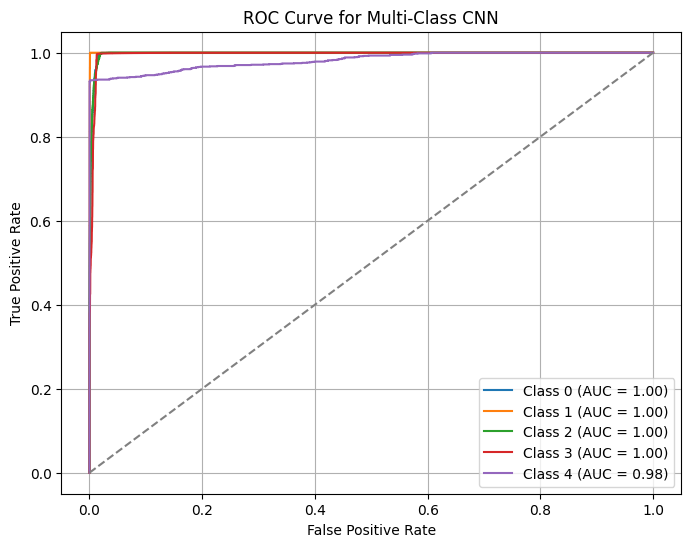

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(cm_cnn.shape[0]):
    fpr_i, tpr_i, _ = roc_curve(Y_test == i, predictions[:, i])
    auc = roc_auc_score(Y_test == i, predictions[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class CNN")
plt.legend()
plt.grid()
plt.show()

## 8.RNN:

In [ ]:
#Convert Data into Sequential Format

sequence_length = 10

# Create sequences grouped by id
X = []
y = []

def create_sequences(features, targets, sequence_length):
    X = []
    y = []
    for i in range(len(features) - sequence_length):
        X.append(features[i : i + sequence_length])  # Take a slice of sequence_length
        y.append(targets[i + sequence_length])  # Take the next target as the label
    return np.array(X), np.array(y)
# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split into train and test sets
X_train_seq,  Y_train_seq = create_sequences(X_train_selected, Y_train, sequence_length)
X_test_seq,  Y_test_seq = create_sequences(X_train_selected, Y_train, sequence_length)

print(f"Shape of X_train: {X_train_seq.shape}")
print(f"Shape of y_train: {Y_train_seq.shape}")
print(f"Shape of X_test: {X_test_seq.shape}")
print(f"Shape of y_test: {Y_test_seq.shape}")

# Verify shapes
assert X_train_seq.shape[0] == Y_train_seq.shape[0]
assert X_test_seq.shape[0] == Y_test_seq.shape[0]

num_classes = len(np.unique(Y_train))  # Number of unique classes
Y_train_seq = to_categorical(Y_train_seq, num_classes=num_classes)
Y_test_seq = to_categorical(Y_test_seq, num_classes=num_classes)

Shape of X_train: (299718, 10, 13)
Shape of y_train: (299718,)
Shape of X_test: (299718, 10, 13)
Shape of y_test: (299718,)


In [ ]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(sequence_length, X_train_seq.shape[2]), return_sequences=True))
model.add(Dropout(0.3))  # Dropout to reduce overfitting
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train_seq, Y_train_seq, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_seq, Y_test_seq, verbose=2)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 141s 18ms/step - accuracy: 0.9027 - loss: 0.5092 - val_accuracy: 0.9078 - val_loss: 0.4249
Epoch 2/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 133s 18ms/step - accuracy: 0.9073 - loss: 0.4348 - val_accuracy: 0.9078 - val_loss: 0.4251
Epoch 3/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 136s 18ms/step - accuracy: 0.9075 - loss: 0.4321 - val_accuracy: 0.9078 - val_loss: 0.4246
Epoch 4/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 135s 18ms/step - accuracy: 0.9081 - loss: 0.4302 - val_accuracy: 0.9078 - val_loss: 0.4247
Epoch 5/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 136s 18ms/step - accuracy: 0.9075 - loss: 0.4307 - val_accuracy: 0.9078 - val_loss: 0.4246
9367/9367 - 62s - 7ms/step - accuracy: 0.9077 - loss: 0.4248
Test Loss: 0.4247566759586334
Test Accuracy: 0.9076598882675171


In [ ]:
# Define the RNN model
model = Sequential()
model.add(SimpleRNN(128, activation='relu', input_shape=(sequence_length, X_train_seq.shape[2]), return_sequences=True))
model.add(Dropout(0.3))  # Dropout to reduce overfitting
model.add(SimpleRNN(64, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))  # Additional dense layer for complexity
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
start_time = time.time()
history = model.fit(X_train_seq, Y_train_seq, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_seq, Y_test_seq, verbose=2)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

training_time_RNN = time.time() - start_time
print(f'training time: {training_time_RNN}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 63s 8ms/step - accuracy: 0.8905 - loss: 0.5175 - val_accuracy: 0.9078 - val_loss: 0.4251
Epoch 2/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 60s 8ms/step - accuracy: 0.9079 - loss: 0.4396 - val_accuracy: 0.9078 - val_loss: 0.4260
Epoch 3/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 60s 8ms/step - accuracy: 0.9073 - loss: 0.4363 - val_accuracy: 0.9078 - val_loss: 0.4245
Epoch 4/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 60s 8ms/step - accuracy: 0.9090 - loss: 0.4282 - val_accuracy: 0.9078 - val_loss: 0.4254
Epoch 5/5
7493/7493 ━━━━━━━━━━━━━━━━━━━━ 60s 8ms/step - accuracy: 0.9076 - loss: 0.4302 - val_accuracy: 0.9078 - val_loss: 0.4246
9367/9367 - 24s - 3ms/step - accuracy: 0.9077 - loss: 0.4247
Test Loss: 0.42473578453063965
Test Accuracy: 0.9076598882675171
training time: 327.99870586395264


In [ ]:
# Get probability predictions for the test set
y_pred_proba_rnn = model.predict(X_test_seq)

9367/9367 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step


In [ ]:
start_time = time.time()
y_pred_rnn = np.argmax(model.predict(X_test_seq), axis=1)
testing_time_RNN = time.time() - start_time
print(f'testing time: {testing_time_RNN}')

9367/9367 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step
testing time: 29.222124814987183


In [ ]:
Y_test_seq

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
y_pred_rnn

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
y_pred_proba_rnn

array([[0.03039867, 0.01010854, 0.04465655, 0.89503294, 0.01980321],
       [0.02932477, 0.0091764 , 0.04228494, 0.900298  , 0.01891586],
       [0.02865824, 0.00900152, 0.04176315, 0.90252984, 0.01804726],
       ...,
       [0.02746009, 0.00837628, 0.04018512, 0.90656126, 0.01741733],
       [0.02833428, 0.00898786, 0.04096359, 0.9039065 , 0.01780778],
       [0.02883288, 0.00910923, 0.04246378, 0.901429  , 0.01816517]],
      dtype=float32)

In [ ]:
Y_test_seq = np.argmax(Y_test_seq, axis=1)  # For one-hot encoded labels

In [ ]:
Y_test_seq

array([3, 3, 3, ..., 3, 3, 3])

#### Model's Evaluation:

In [ ]:
accuracy_rnn = accuracy_score(Y_test_seq, y_pred_rnn)
balanced_accuracy_rnn = balanced_accuracy_score(Y_test_seq, y_pred_rnn)
precision_rnn = precision_score(Y_test_seq, y_pred_rnn, average='weighted')
recall_rnn = recall_score(Y_test_seq, y_pred_rnn, average='weighted')
f1_rnn = f1_score(Y_test_seq, y_pred_rnn, average='weighted')
roc_auc_rnn = roc_auc_score(Y_test_seq, y_pred_proba_rnn, multi_class='ovr')
mcc_rnn = matthews_corrcoef(Y_test_seq, y_pred_rnn)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Accuracy: {accuracy_rnn:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_rnn:.4f}")
print(f"Precision: {precision_rnn:.4f}")
print(f"Recall: {recall_rnn:.4f}")
print(f"F1-score: {f1_rnn:.4f}")
print(f"ROC-AUC: {roc_auc_rnn:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_rnn:.4f}")

Accuracy: 0.9077
Balanced Accuracy: 0.2000
Precision: 0.8238
Recall: 0.9077
F1-score: 0.8637
ROC-AUC: 0.5154
Matthews Correlation Coefficient: 0.0000


* Accuracy: A 90.77% accuracy could initially seem promising, but it doesn't tell the full story in cases of class imbalance.
* Balanced Accuracy: The balanced accuracy of 20% indicates poor performance across different classes, with the model likely overfitting to the majority class.
* Precision and Recall: The precision of 82.38% and recall of 90.77% show that the model is somewhat effective in identifying positives, but it could still be struggling with false positives and handling class imbalance.
* F1-Score: A F1-score of 86.37% indicates a decent trade-off between precision and recall, but again, this might be misleading due to class imbalance.
* ROC-AUC: The ROC-AUC score of 51.54% suggests that the model is almost as bad as random guessing in terms of distinguishing between the positive and negative classes.
* MCC: An MCC of 0 implies that the model’s predictions are not meaningfully aligned with the actual outcomes, and it is performing poorly overall.

In [ ]:
cm_rnn = confusion_matrix(Y_test_seq, y_pred_rnn)
print("Confusion Matrix:\n", cm_rnn)

Confusion Matrix:
 [[     0      0      0   8039      0]
 [     0      0      0   2650      0]
 [     0      0      0  11677      0]
 [     0      0      0 272042      0]
 [     0      0      0   5310      0]]


**Class 1 (Row 1):**
* 8039 instances of Class 1 are misclassified as Class 4.
* No instances of Class 1 are predicted as Class 1, Class 2, or Class 3.
  
**Class 2 (Row 2):**
* 2650 instances of Class 2 are misclassified as Class 4.
* No instances of Class 2 are predicted as Class 1, Class 2, or Class 3.
  
**Class 3 (Row 3):**
* 11677 instances of Class 3 are misclassified as Class 4.
* No instances of Class 3 are predicted as Class 1, Class 2, or Class 3.
  
**Class 4 (Row 4):**
* 272042 instances of Class 4 are correctly classified as Class 4.
* No instances of Class 4 are predicted as any other class (Class 1, Class 2, or Class 3).
  
**Class 5 (Row 5):**
* 5310 instances of Class 5 are misclassified as Class 4.
* No instances of Class 5 are predicted as Class 1, Class 2, or Class 3

In [ ]:
loss_rnn = log_loss(Y_test_seq, y_pred_proba_rnn)
print(f"Log Loss: {loss_rnn}")

Log Loss: 0.42473695441738046


A Log Loss of 0.4247 indicates the model’s predictions are not optimal. The misclassifications of multiple classes as Class 4 lead to this moderate Log Loss.

In [ ]:
data.loc["RNN"] = [f"{training_time_RNN:.4f}",
                  f"{testing_time_RNN:.4f}",
                  f"{accuracy_rnn:.4f}",
                  f"{balanced_accuracy_rnn:.4f}",
                  f"{precision_rnn:.4f}",
                  f"{recall_rnn:.4f}",f"{f1_nn:.4f}",
                  f"{roc_auc_rnn:.4f}",
                  f"{mcc_rnn:.4f}",
                  f"{loss_rnn:.4f}"]
data.to_excel('/kaggle/working/modelsEvaluation.xlsx')

In [ ]:
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
tpr_rnn = []
fpr_rnn = []

# For each class
for i in range(cm_rnn.shape[0]):
    tp = cm_rnn[i, i]  # True Positive for class i
    fn = cm_rnn[i, :].sum() - tp  # False Negatives for class i
    fp = cm_rnn[:, i].sum() - tp  # False Positives for class i
    tn = cm_rnn.sum() - (tp + fn + fp)  # True Negatives for class i
    
    tpr = tp / (tp + fn)  # True Positive Rate (Recall) for class i
    fpr = fp / (fp + tn)  # False Positive Rate for class i
    
    tpr_rnn.append(tpr)
    fpr_rnn.append(fpr)

    print(f"Class {i}: TPR = {tpr:.4f}, FPR = {fpr:.4f}")

Class 0: TPR = 0.0000, FPR = 0.0000
Class 1: TPR = 0.0000, FPR = 0.0000
Class 2: TPR = 0.0000, FPR = 0.0000
Class 3: TPR = 1.0000, FPR = 1.0000
Class 4: TPR = 0.0000, FPR = 0.0000


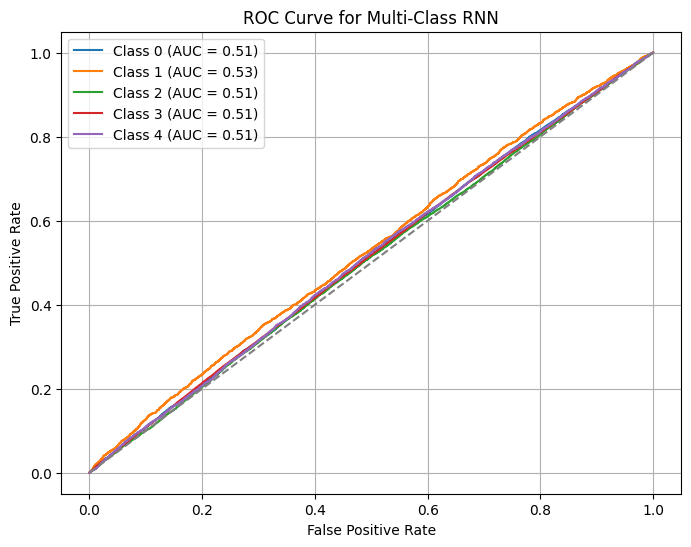

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(cm_rnn.shape[0]):
    fpr_i, tpr_i, _ = roc_curve(Y_test_seq == i, y_pred_proba_rnn[:, i])
    auc = roc_auc_score(Y_test_seq == i, y_pred_proba_rnn[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class RNN")
plt.legend()
plt.grid()
plt.show()

# Evaluation


In [ ]:
data

,training time,testing time,Accuracy,Balanced Accuracy,Precision,Recall,F1-score,ROC-AUC,matthews_corrcoef,Log loss
Logistic regression,36.7079,0.0102,0.9517,0.8946,0.9634,0.9517,0.9559,0.9883,0.7663,0.2190
decision tree,1.6582,0.0108,0.9943,0.9698,0.9944,0.9943,0.9943,0.9848,0.9672,0.2054
Random Forest,38.0232,1.0556,0.9972,0.9815,0.9972,0.9972,0.9971,0.9966,0.9836,0.0296
SVM,6.2726,0.0093,0.9664,0.8118,0.9642,0.9664,0.9644,0.9888,0.7991,0.5312
KNN,1.1891,38.3229,0.9939,0.9545,0.9939,0.9939,0.9939,0.9927,0.9647,0.0732
CNN,277.6292,4.4833,0.9873,0.9206,0.9878,0.9873,0.9822,0.9947,0.9271,0.0366
NN,162.2496,2.8832,0.9822,0.9055,0.9851,0.9822,0.9822,0.9943,0.8983,0.0380
RNN,327.9987,29.2221,0.9077,0.2000,0.8238,0.9077,0.9822,0.5154,0.0000,0.4247


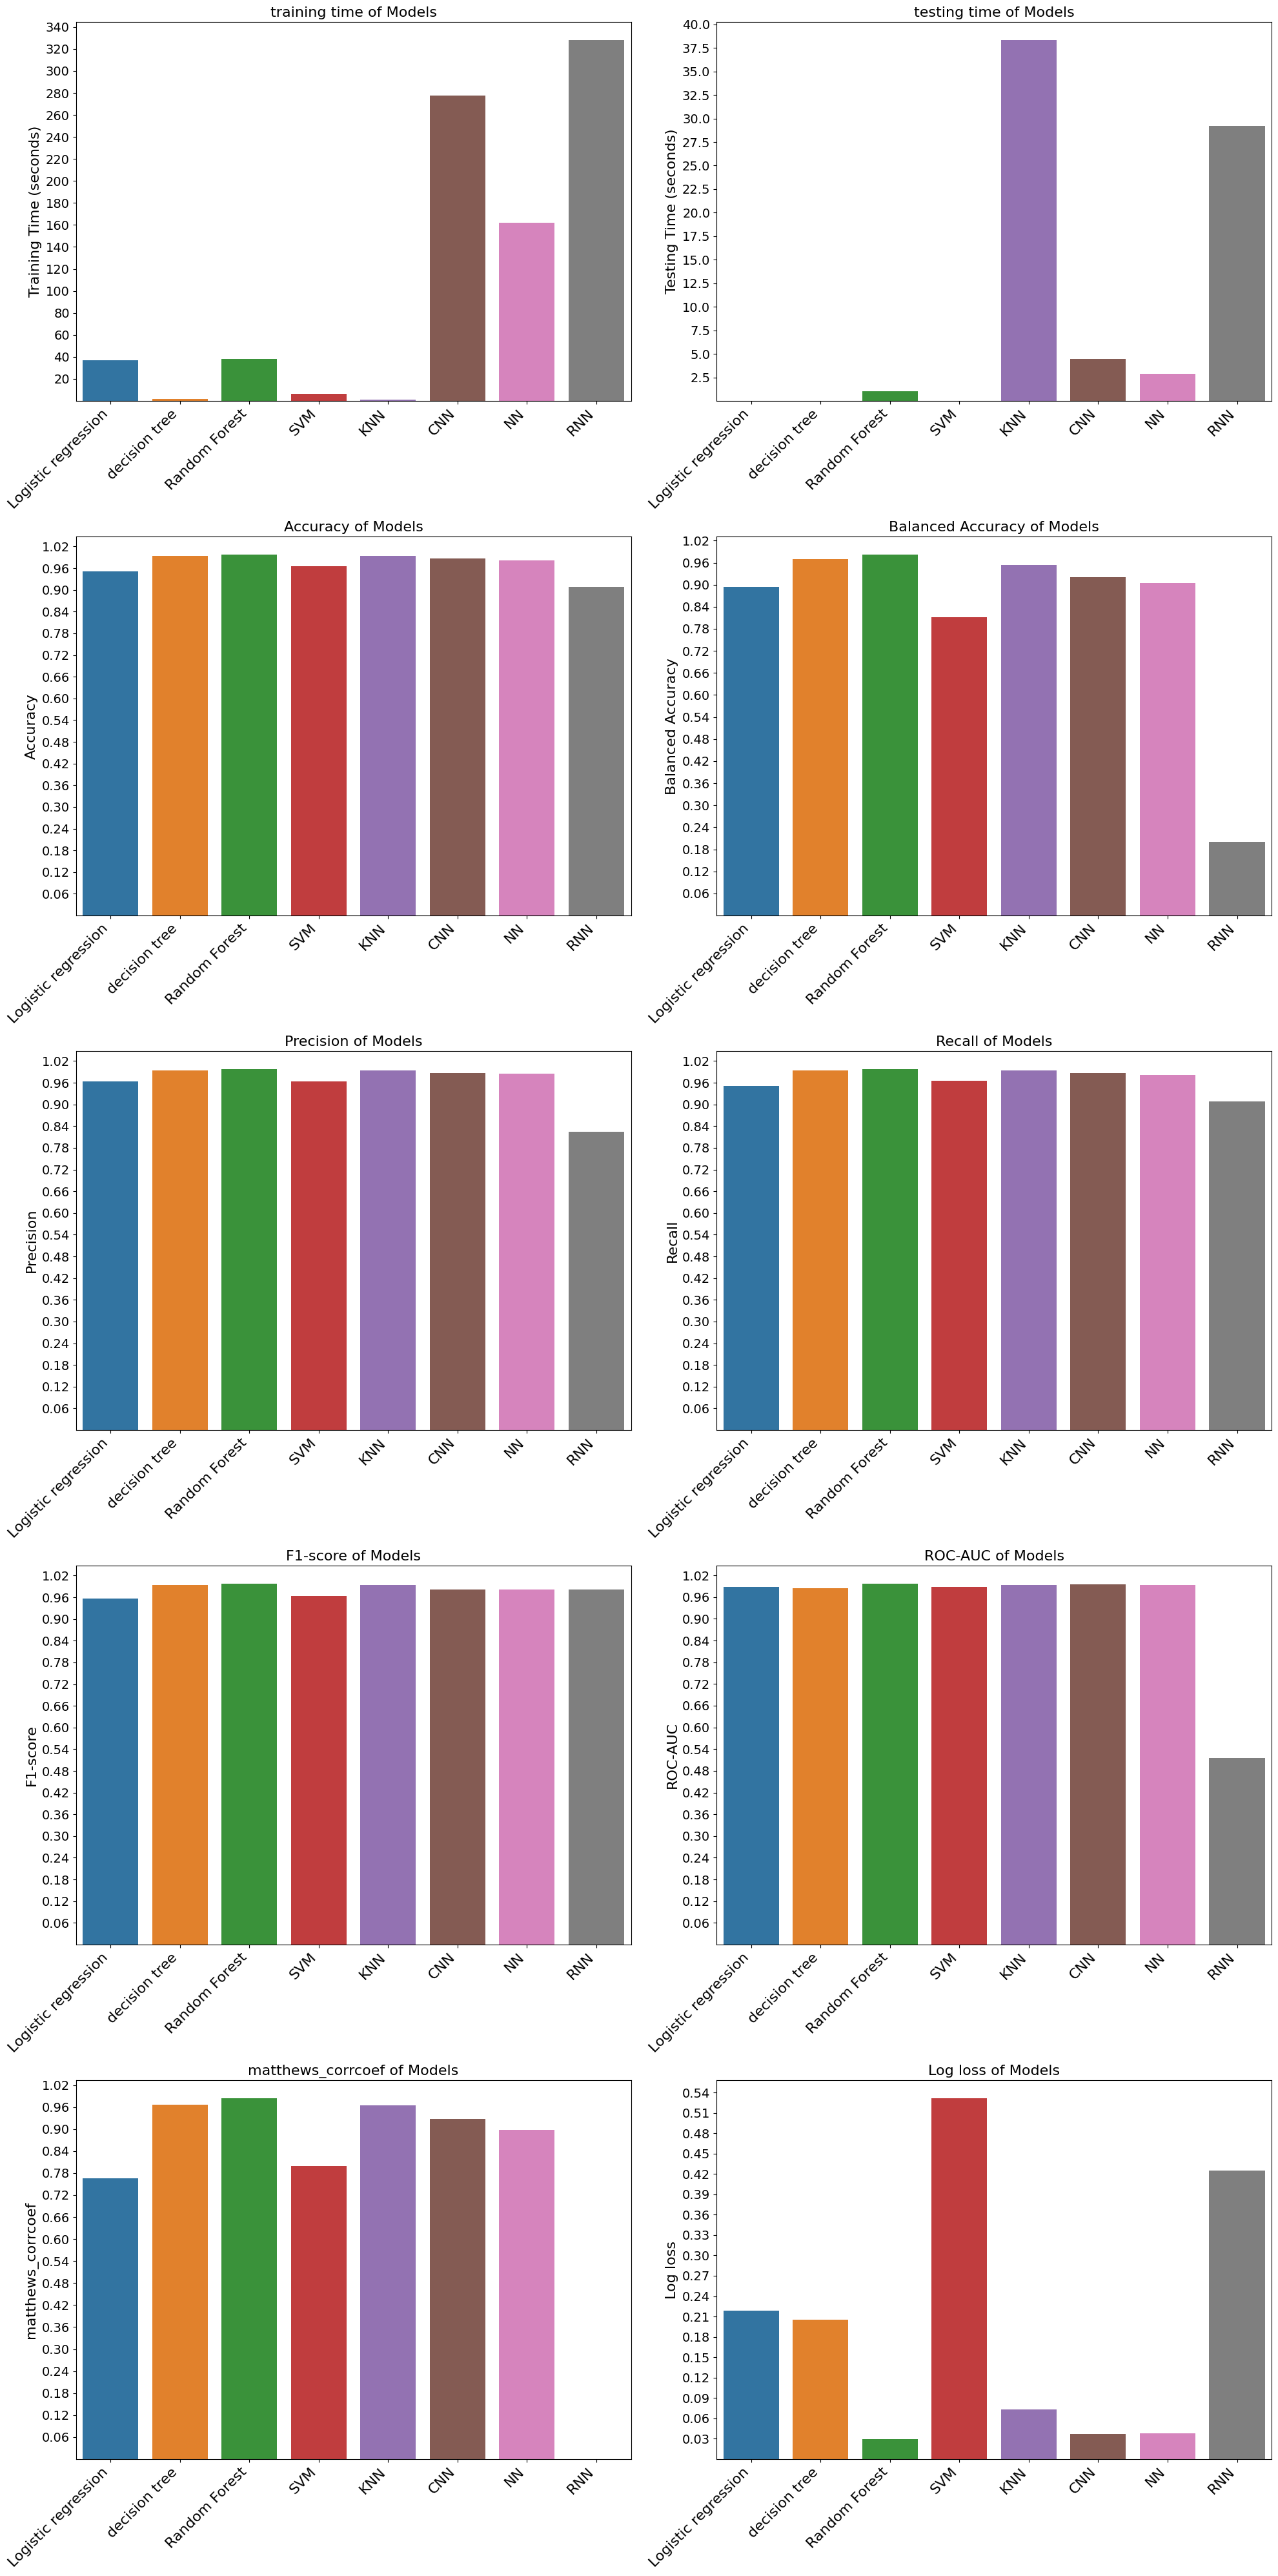

In [ ]:
# Ensure data is numeric
data = data.apply(pd.to_numeric)

# Set up a 5x2 layout
fig, axes = plt.subplots(5, 2, figsize=(20, 40))

# Flatten the axes for easy indexing
axes = axes.flatten()

# Titles and metrics
metrics = [
    ('training time', 'Training Time (seconds)'),
    ('testing time', 'Testing Time (seconds)'),
    ('Accuracy', 'Accuracy'),
    ('Balanced Accuracy', 'Balanced Accuracy'),
    ('Precision', 'Precision'),
    ('Recall', 'Recall'),
    ('F1-score', 'F1-score'),
    ('ROC-AUC', 'ROC-AUC'),
    ('matthews_corrcoef', 'matthews_corrcoef'),
    ('Log loss', 'Log loss')
]

# Loop through metrics and plot
for i, (metric, ylabel) in enumerate(metrics):
    sns.barplot(x=data.index, y=metric, data=data, ax=axes[i])
    axes[i].set_title(f'{metric} of Models', fontsize=16)
    axes[i].set_ylabel(ylabel, fontsize=16)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right', fontsize=16)
    axes[i].tick_params(axis='y', labelsize=14)  # Reduce font size for y-axis numbers
    
    # Set smaller step size for y-axis ticks
    axes[i].yaxis.set_major_locator(ticker.MaxNLocator(nbins=20, prune='both'))  # Adjust nbins as needed

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Visualizing Training Time vs Accuracy

/tmp/ipykernel_24/3144486791.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data["training time"][i], data["Accuracy"][i], model, fontsize=8)


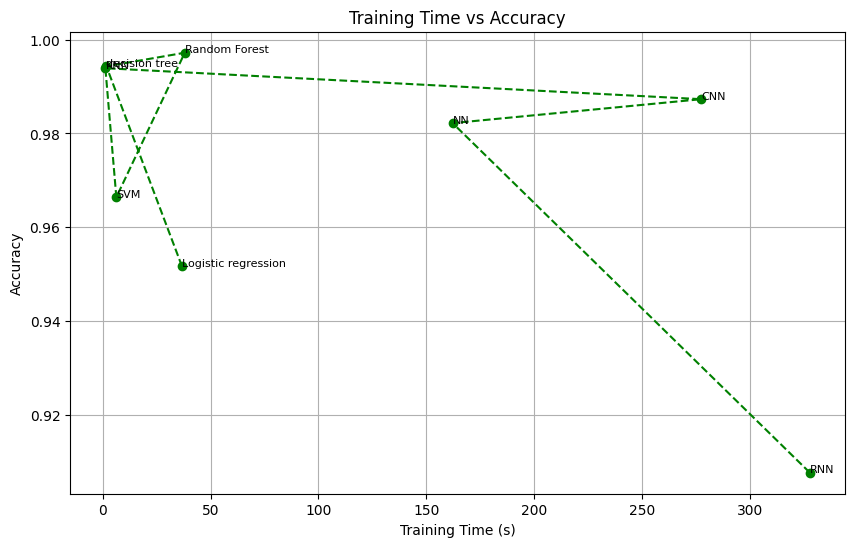

In [ ]:
# Plot training time vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(data["training time"], data["Accuracy"], marker='o', linestyle='--', color='g')

# Annotate model names
for i, model in enumerate(data.index):
    plt.text(data["training time"][i], data["Accuracy"][i], model, fontsize=8)
    
plt.xlabel("Training Time (s)")
plt.ylabel("Accuracy")
plt.title("Training Time vs Accuracy")
plt.grid()
plt.show()

### ROC-AUC Across Models


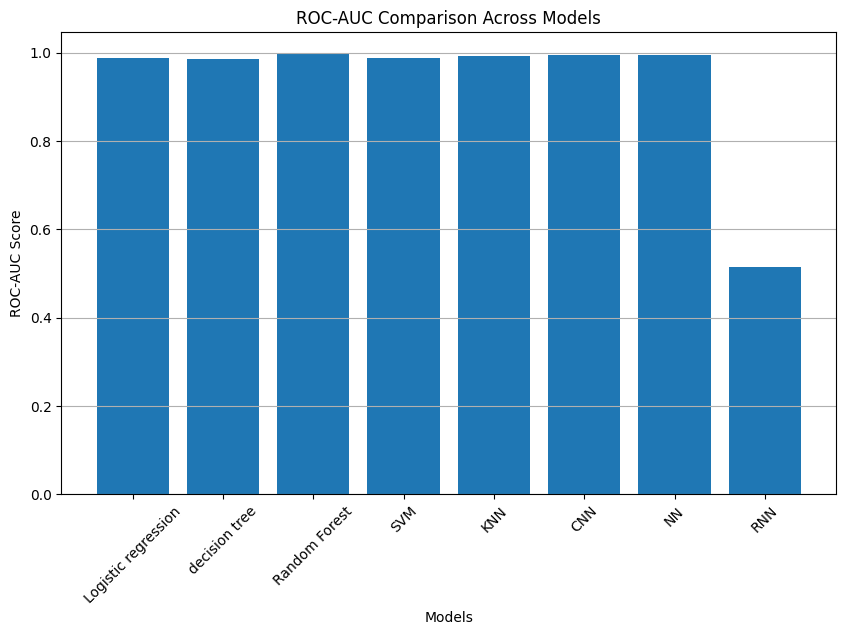

In [ ]:
# Bar plot for ROC-AUC comparison
plt.figure(figsize=(10, 6))
plt.bar(data.index, data["ROC-AUC"])

plt.xlabel("Models")
plt.ylabel("ROC-AUC Score")
plt.title("ROC-AUC Comparison Across Models")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


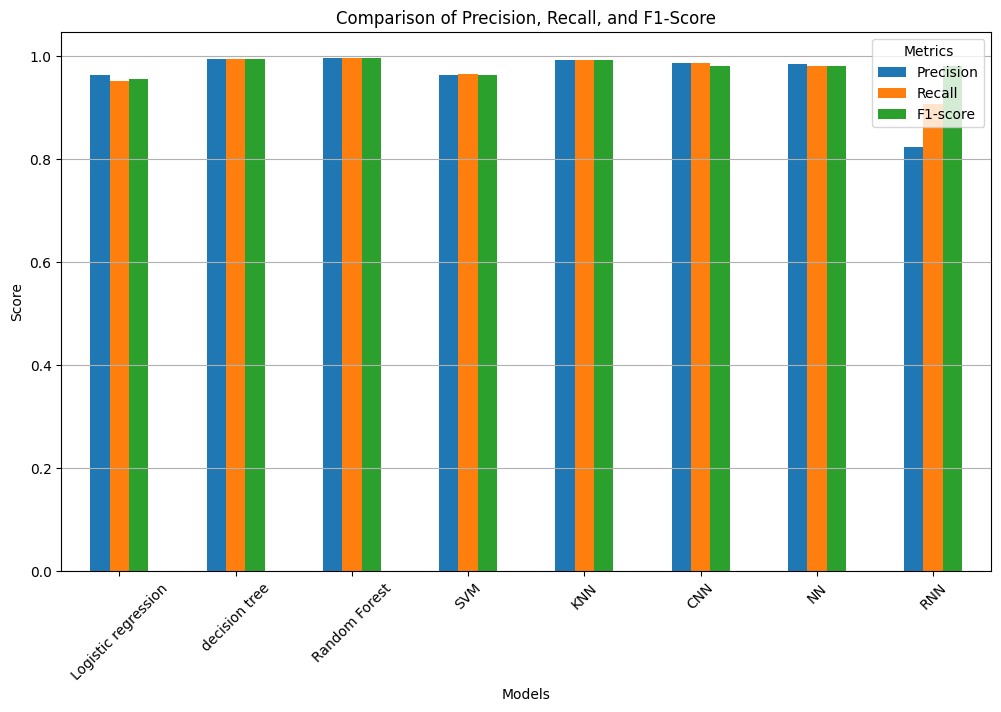

In [ ]:
# Plot Precision, Recall, and F1-Score
metrics = ["Precision", "Recall", "F1-score"]
data_metrics = data[metrics]

# Create a grouped bar plot
data_metrics.plot(kind='bar', figsize=(12, 7))

plt.title("Comparison of Precision, Recall, and F1-Score")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.grid(axis='y')
plt.show()


/tmp/ipykernel_24/1653020521.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data["testing time"][i], data["Balanced Accuracy"][i], model, fontsize=10)


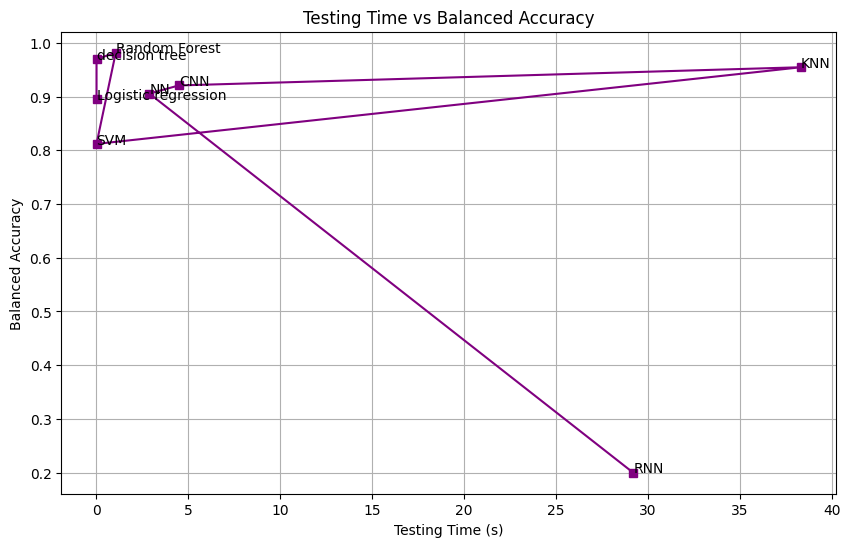

In [ ]:
# Plot Testing Time vs Balanced Accuracy
plt.figure(figsize=(10, 6))
plt.plot(data["testing time"], data["Balanced Accuracy"], marker='s', linestyle='-', color='purple')

# Annotate model names
for i, model in enumerate(data.index):
    plt.text(data["testing time"][i], data["Balanced Accuracy"][i], model, fontsize=10)

plt.xlabel("Testing Time (s)")
plt.ylabel("Balanced Accuracy")
plt.title("Testing Time vs Balanced Accuracy")
plt.grid()
plt.show()
